# Synthetic Data Generation

- Name: M. H. Bethmi Kisalka
- Student ID: s224028677

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load one file 
file_name = 'ScrappedData.2025_04_02_Coles.csv'
data = pd.read_csv(file_name)
data.head()

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link
0,67ed14d6a8bdc17e3ddceed5,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
1,67ed14d6a8bdc17e3ddceed6,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
2,67ed14d6a8bdc17e3ddceed7,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,$3.0,$0.49 per 1ea,$4.40,$0.49 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
3,67ed14d6a8bdc17e3ddceed9,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,$6.70,$5.88 per 100g,$6.70,$5.88 per 100g,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...
4,67ed14d6a8bdc17e3ddceedb,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...


In [117]:
# get column names
data.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link'],
      dtype='object')

In [116]:
# get data shape
data.shape

(140, 12)

In [7]:
# check for duplicates
data.duplicated().sum()

0

In [8]:
# check for missing values
data.isna().sum()

_id                  0
product_code         0
category             0
item_name            0
best_price           0
best_unit_price      0
item_price           0
unit_price           0
price_was          116
special_text        66
promo_text         115
link                 0
dtype: int64

In [21]:
# get unique product items
data[['product_code','item_name']].value_counts()

product_code  item_name                                                           
8371390       Coles Hot Cross Buns Traditional Fruit | 6 Pack                         3
2686693       Coles Deli Thawed Australian Cooked Black Tiger Pra ... approx. 250g    3
4885191       Cadbury Dairy Milk Easter Chocolate Eggs Bag | 114g                     2
1786160       Red Rock Deli Honey Soy Chicken Potato Chips | 165g                     2
8940564       Bibigo Korean Corndog Potato Crispy | 400GRAM                           2
                                                                                     ..
3301820       Castello Double Cream Truffle Cheese | 150g                             1
3292718       Kiddylicious Gluten Free Strawberry & Banana Smoothie Melts | 6g        1
3272845       Castello Double Cream Brie Chilli | 150g                                1
3029086       Castello Creamy Havarti | 200g                                          1
9633786       Cadbury Selections Larg

In [7]:
data.columns

Index(['Unnamed: 0', '_id', 'product_code', 'category', 'item_name',
       'best_price', 'best_unit_price', 'item_price', 'unit_price',
       'price_was', 'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight', 'similarity_score'],
      dtype='object')

In [67]:
data1.isna().sum()

Unnamed: 0              0
_id                     0
product_code            0
category                0
item_name               0
best_price              0
best_unit_price     77053
item_price              0
unit_price           2237
price_was           77641
special_text        69680
promo_text          59274
link                    0
brand                   0
item_size           66683
unit_weight          2238
similarity_score        0
dtype: int64

In [2]:
file_name = 'merged_data.csv'
data = pd.read_csv(file_name, index_col=False)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link,brand,item_size,unit_weight,similarity_score
0,0,67ed14d6a8bdc17e3ddceed5,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,3.0,0.73,4.4,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.198373
1,1,67ed14d6a8bdc17e3ddceed6,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,3.0,0.73,4.4,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.198373
2,2,67ed14d6a8bdc17e3ddceed7,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,3.0,0.49,4.4,0.49,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,9 Pack,1ea,0.198373
3,3,67ed14d6a8bdc17e3ddceed9,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,6.7,5.88,6.7,5.88,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury,114g,100g,0.214731
4,4,67ed14d6a8bdc17e3ddceedb,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,3.0,0.73,4.4,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.198373


In [3]:
df = data.drop(columns=['Unnamed: 0'], errors='ignore')

In [4]:
df.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight', 'similarity_score'],
      dtype='object')

### Plot by category

In [24]:
data['category'].unique()

array(['Easter', "Footy's Back", 'Bonus Credit Products',
       'Meat & Seafood', 'Fruit & Vegetables', 'Dairy, Eggs & Fridge',
       'Bakery', 'Deli', 'Pantry', 'Dietary & World Foods',
       'Chips, Chocolates & Snacks', 'Drinks', 'Frozen', 'Household'],
      dtype=object)

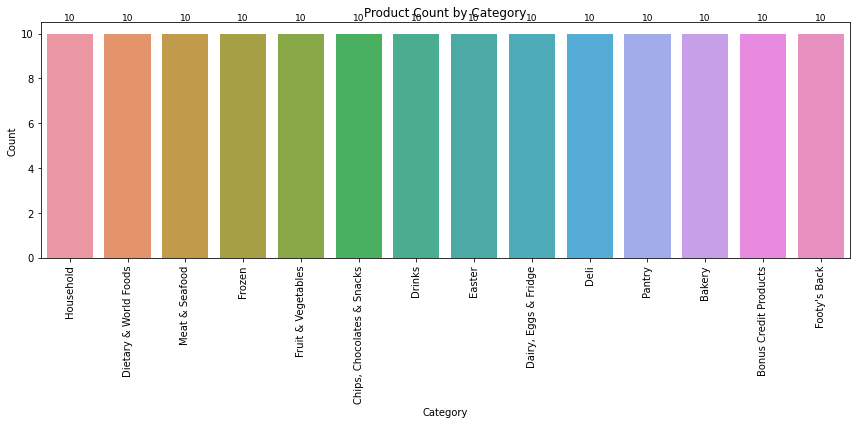

In [3]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='category', order=data['category'].value_counts().index)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,  # x, y position
            str(count), ha='center', va='bottom', fontsize=9)

plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [31]:
# get brand per category
items_per_category = {}
categories = list(data['category'].unique())
for category in categories: 
    items_per_category[category] = data[data['category'] == category]['item_name'].tolist()

In [33]:
items_per_category['Easter']

['Coles Hot Cross Buns Traditional Fruit | 6 Pack',
 'Coles Hot Cross Buns Choc Chip | 6 Pack',
 'Coles Hot Cross Buns Traditional Fruit Mini | 9 Pack',
 'Cadbury Dairy Milk Easter Chocolate Eggs Bag | 114g',
 'Coles Hot Cross Buns Apple & Cinnamon | 6 Pack',
 'Cadbury Selections Large Easter Chocolate Eggs Bag | 545g',
 'Greens Deluxe Jam & Cream Lamington Cake Roll | 300g',
 'Cadbury Dairy Milk Chocolate Easter Egg Hunt Carton | 306g',
 'Coles Lamb Leg Roast Half | approx. 1.74kg',
 'Coles Deli Thawed Australian Cooked Black Tiger Pra ... approx. 250g']

## Extract Brand 

In [47]:
# extract the brand names
def extract_brand_name(items_per_category, categories):
    brand_names = []
    
    for category in categories:
        for item in items_per_category[category]:
            item_words = item.split()[:2]
            brand_guess = ' '.join(item_words)
            
            if brand_guess not in brand_names:
                brand_names.append(brand_guess)
            
    return brand_names

In [48]:
brand_names = extract_brand_name(items_per_category, categories)

In [49]:
brand_names

['Coles Hot',
 'Cadbury Dairy',
 'Cadbury Selections',
 'Greens Deluxe',
 'Coles Lamb',
 'Coles Deli',
 'Mcvities Digestives',
 'Red Rock',
 'Ferrero Rocher',
 'Peckish Gluten',
 'Cadbury Favourites',
 "Four'N Twenty",
 'Maybelline Colossal',
 'Maybelline Lash',
 'Maybelline Sky',
 'Sirena Tuna',
 'Maybelline Falsies',
 'Coles No',
 'Coles Boneless',
 'Continental Stock',
 'Coles RSPCA',
 'Mount Barker',
 'Continental Chicken',
 'Coles Pink',
 'Coles Shepard',
 'Coles Raspberries',
 'Coles Bananas',
 'Fresh Grapes',
 'Coles Strawberries',
 'Coles Blueberries',
 'Coles Seedless',
 'Coles Continental',
 'Brownes Dairy',
 'Fresh Fodder',
 'The Good',
 'Danone Ultimate',
 'Danone The',
 'Devondale Salted',
 'Devondale Extra',
 'Lurpak Butter',
 'Tip Top',
 'Noshu 95%',
 'Mr Kipling',
 'Castello Aged',
 'Castello Double',
 'Castello Creamy',
 'Castello Blue',
 'Kenilworth Roast',
 'KCF Lime',
 'Kenilworth Sweet',
 "Leggo's Bolognese",
 'Wicked Kimchi',
 'Val Verde',
 'Nestle Kit',
 'Nutella

In [34]:
# extract the actual brand names from the brand names
actual_brand_names = ['Coles', 'Cadbury', 'Greens', 'Mcvities Digestives', 'Red Rock', 'Ferrero Rocher', 'Peckish',
                     "Four'N Twenty", 'Maybelline', 'Sirena', 'Continental', 'Mount Barker', 'Brownes', 'Fresh Fodder', 'The Good Farmer',
                     'Danone', 'Devondale', 'Lurpak', 'Tip Top', 'Noshu', 'Mr Kipling', 'Castello', 'Kenilworth', "Leggo's", 'Wicked',
                     'Val Verde', 'Nestle', 'Nutella', 'Dolmio', 'Tegel Takeouts', 'Nuttelex', 'Healthy Baker', 'Old El Paso', 'Eclipse',
                     'Bibigo', 'Kiddylicious', "Arnott's", "Smith's", 'Sunbites', 'Illy','Pepsi', 'Fever_Tree', 'Solo Thirst Crusher', 
                     'Schweppes', 'Sunkist', 'Birds Eye', 'Pickers', 'Comfort', 'OMO', 'Surf', 'Tide','Smiths']


In [52]:
# match brand name
def match_brand(item_name, actual_brand_names):
    if not isinstance(item_name, str):
        return "Unknown"
    
    item_name_lower = item_name.lower()

    for brand in actual_brand_names:
        if brand.lower() in item_name_lower:
            return brand  # return the original-cased brand
    return "Unknown" 

In [6]:
data['brand'] = data['item_name'].apply(match_brand)

In [7]:
data[['item_name', 'brand']]

,item_name,brand
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,Coles
1,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,Coles
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,Cadbury
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles
...,...,...
135,Sunkist Orange Soft Drink Cans Multipack 375mL...,Sunkist
136,Pickers Mini Italian Herb Mozzarella Sticks | ...,Pickers
137,Birds Eye Frozen Fish Fingers 40 Pieces | 1kg,Birds Eye
138,Coles Frozen Fruit Blueberries | 500g,Coles


## Extract item size using regex

- Extract sizes:
    - Pack
    - g
    - kg
    - each
    - ml
    - l etc

In [56]:
import re

def extract_clean_item_size(item_name):
    if not isinstance(item_name, str):
        return None

    marker_match = re.search(r'(?:\|\s*|approx\.?\s*|…\s*)([\d]+\.?\d*\s*[a-zA-Z]+)', item_name, re.IGNORECASE)
    if marker_match:
        return marker_match.group(1).strip()

    fallback_match = re.search(r'(\d+\.?\d*\s*(?:g|kg|ml|mL|L|GRAM|each|pack|pk|x\s*\d+\s*[a-zA-Z]+))$', item_name, re.IGNORECASE)
    if fallback_match:
        return fallback_match.group(1).strip()

    return None


In [9]:
data['item_size'] = data['item_name'].apply(extract_clean_item_size)  # extract item size from item name

In [10]:
data[['item_name', 'item_size']]

,item_name,item_size
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,6 Pack
1,Coles Hot Cross Buns Choc Chip | 6 Pack,6 Pack
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,9 Pack
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,114g
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,6 Pack
...,...,...
135,Sunkist Orange Soft Drink Cans Multipack 375mL...,30 pack
136,Pickers Mini Italian Herb Mozzarella Sticks | ...,230g
137,Birds Eye Frozen Fish Fingers 40 Pieces | 1kg,1kg
138,Coles Frozen Fruit Blueberries | 500g,500g


In [107]:
for index, row in data[['item_name', 'item_size']].iterrows():
    print(f"Item: {row['item_name']}  |  Size: {row['item_size']}")

Item: Coles Hot Cross Buns Traditional Fruit | 6 Pack  |  Size: 6 Pack
Item: Coles Hot Cross Buns Choc Chip | 6 Pack  |  Size: 6 Pack
Item: Coles Hot Cross Buns Traditional Fruit Mini | 9 Pack  |  Size: 9 Pack
Item: Cadbury Dairy Milk Easter Chocolate Eggs Bag | 114g  |  Size: 114g
Item: Coles Hot Cross Buns Apple & Cinnamon | 6 Pack  |  Size: 6 Pack
Item: Cadbury Selections Large Easter Chocolate Eggs Bag | 545g  |  Size: 545g
Item: Greens Deluxe Jam & Cream Lamington Cake Roll | 300g  |  Size: 300g
Item: Mcvities Digestives Biscuits Milk Chocolate | 266g  |  Size: 266g
Item: Mcvities Digestives Biscuits Dark Chocolate | 266g  |  Size: 266g
Item: Red Rock Deli Potato Chips Sweet Chilli And Sour Cream | 165g  |  Size: 165g
Item: Red Rock Deli Honey Soy Chicken Potato Chips | 165g  |  Size: 165g
Item: Cadbury Dairy Milk Chocolate Roll Pack | 55g  |  Size: 55g
Item: Maybelline Colossal Big Shot Volume Express Blackest Mascara | 9.7mL  |  Size: 9.7mL
Item: Maybelline Lash Sensational Fire

In [109]:
data.dtypes

_id                object
product_code        int64
category           object
item_name          object
best_price         object
best_unit_price    object
item_price         object
unit_price         object
price_was          object
special_text       object
promo_text         object
link               object
brand              object
item_size          object
dtype: object

## Extract price and convert them to float

In [11]:
# Define the columns to clean
price_columns = ['best_price', 'item_price']
unit_price_columns = ['best_unit_price', 'unit_price']

# Remove "$" and convert to float for simple price columns
for col in price_columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Extract just the numeric part from unit price columns (e.g., "$0.73 per 1ea" → 0.73)
for col in unit_price_columns:
    price = data[col].str.extract(r'\$?([\d\.]+)').astype(float)
    
    data[f'unit_weight'] = data[col].str.extract(r'per\s+(\w+)', expand=False)
    data[col] = price

In [12]:
data[['item_name','best_price', 'item_price','best_unit_price', 'unit_price', 'unit_weight']]

,item_name,best_price,item_price,best_unit_price,unit_price,unit_weight
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,3.0,4.4,0.73,0.73,1ea
1,Coles Hot Cross Buns Choc Chip | 6 Pack,3.0,4.4,0.73,0.73,1ea
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,3.0,4.4,0.49,0.49,1ea
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,6.7,6.7,5.88,5.88,100g
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,3.0,4.4,0.73,0.73,1ea
...,...,...,...,...,...,...
135,Sunkist Orange Soft Drink Cans Multipack 375mL...,28.0,28.0,2.49,2.49,1l
136,Pickers Mini Italian Herb Mozzarella Sticks | ...,7.5,7.5,3.26,3.26,100g
137,Birds Eye Frozen Fish Fingers 40 Pieces | 1kg,11.5,11.5,11.50,11.50,1kg
138,Coles Frozen Fruit Blueberries | 500g,6.5,6.5,13.00,13.00,1kg


In [126]:
data.dtypes

_id                 object
product_code         int64
category            object
item_name           object
best_price         float64
best_unit_price    float64
item_price         float64
unit_price         float64
price_was           object
special_text        object
promo_text          object
link                object
brand               object
item_size           object
unit_weight         object
dtype: object

In [13]:
# generate similarity score

def compute_similarity(group):
    prices = group['item_price'].values
    # Mean absolute price difference from others
    similarity_scores = []
    for i, price in enumerate(prices):
        diffs = np.abs(prices - price)
        mean_diff = np.mean(diffs)
        # Convert mean difference to similarity score (inverse relationship)
        similarity = 1 / (1 + mean_diff)  # Avoid division by zero
        similarity_scores.append(similarity)
    group['similarity_score'] = similarity_scores
    return group

# Apply per category group
data = data.groupby('category', group_keys=False).apply(compute_similarity)
data.head(20)

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link,brand,item_size,unit_weight,similarity_score
0,67ed14d6a8bdc17e3ddceed5,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
1,67ed14d6a8bdc17e3ddceed6,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
2,67ed14d6a8bdc17e3ddceed7,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,3.00,0.49,4.40,0.49,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,9 Pack,1ea,0.190840
3,67ed14d6a8bdc17e3ddceed9,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,6.70,5.88,6.70,5.88,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury,114g,100g,0.203252
4,67ed14d6a8bdc17e3ddceedb,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
5,67ed14d6a8bdc17e3ddceedc,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,13.00,2.39,13.00,2.39,16.00,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-selec...,Cadbury,545g,100g,0.125313
6,67ed14d6a8bdc17e3ddceede,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,6.00,2.00,6.00,2.00,NaN,NEW,NaN,https://www.coles.com.au/product/greens-deluxe...,Greens,300g,100g,0.203252
7,67ed14d6a8bdc17e3ddceedf,5854739,Footy's Back,Mcvities Digestives Biscuits Milk Chocolate | ...,2.75,1.03,2.75,1.03,5.50,50%,NaN,https://www.coles.com.au/product/mcvities-dige...,Mcvities Digestives,266g,100g,0.284091
8,67ed14d6a8bdc17e3ddceee0,5854717,Footy's Back,Mcvities Digestives Biscuits Dark Chocolate | ...,2.75,1.03,2.75,1.03,5.50,50%,NaN,https://www.coles.com.au/product/mcvities-dige...,Mcvities Digestives,266g,100g,0.284091
9,67ed14d6a8bdc17e3ddceee1,1786182,Footy's Back,Red Rock Deli Potato Chips Sweet Chilli And So...,3.15,1.91,3.15,1.91,6.30,50%,NaN,https://www.coles.com.au/product/red-rock-deli...,Red Rock,165g,100g,0.290698


## Merge other data

In [14]:
# read other csvs
file_names = ['ScrappedData.2025_04_03_Coles.csv', 'ScrappedData.2025_04_08_Coles.csv', 'ScrappedData.2025_04_09_Coles.csv', 'ScrappedData.2025_04_17_Coles_All.csv']
data_1, data_2, data_3, data_4 = [pd.read_csv(fp) for fp in file_names]

In [15]:
# merge csv
merged_df = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True, sort=False)

In [19]:
merged_df.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link'],
      dtype='object')

In [35]:
def find_new_brand_names(item_names, actual_brand_names, max_words=3):
    new_brand_names = []

    # Convert actual brand names to lowercase for comparison
    actual_brands_lower = [brand.lower() for brand in actual_brand_names]

    for item in item_names:
        item_lower = item.lower()
        # Check if any known brand is already in the item
        if not any(brand in item_lower for brand in actual_brands_lower):
            # Take the first max_words from the item
            brand_guess = ' '.join(item.split()[:max_words]).strip()

            # Add if it's not already captured (case-insensitive)
            if brand_guess.lower() not in [b.lower() for b in new_brand_names]:
                new_brand_names.append(brand_guess)

    return new_brand_names

In [36]:
item_names = merged_df['item_name'].dropna().tolist()

new_brands = find_new_brand_names(item_names, actual_brand_names)


# updated_brand_list = actual_brand_names + new_brands


In [37]:
new_brands

['Sensodyne Repair &',
 'Sensodyne Soft Daily',
 'Sensodyne Complete Care',
 'Tassal Tasmanian Smoked',
 'Tassal Hot Smoked',
 'Fresh Grapes Seedless',
 'Western Star Traditional',
 'Harvey Fresh Vanilla',
 'Pauls Custard Vanilla',
 'Tablelands Dairy Blend',
 'Pauls Custard Snack',
 'Western Star Supersoft',
 'Bega Dairy Natural',
 'Mersey Valley Club',
 'Tasmanian Heritage Triple',
 'Happy Snack Company',
 'La Espanola Extra',
 'Slice X Chupa',
 "Abe's Bagels Everything",
 'Vegemite Spread |',
 'Gravox Traditional Gravy',
 'MasterFoods All Purpose',
 'Carmans Chia Bowls',
 'Liberate Gluten Free',
 'John West Tempters',
 'Bega Tasty Block',
 'MasterFoods Soy Honey',
 'Powerade Berry Ice',
 'Powerade Mountain Blast',
 'Powerade ION4 Blackcurrent',
 'Coca-Cola Zero Sugar',
 'Gym Bod Caramel',
 'Streets Golden Gaytime',
 'Streets Paddle Pop',
 'Streets Blue Ribbon',
 'Gym Bod Cookies',
 'Weis Ice Cream',
 'Easter Hunt Basket',
 'Canesten Antibacterial and',
 'Oral B IO2',
 'Libra Goodnigh

In [40]:
unique_brand_names

['Sensodyne Repair &',
 'Tassal Tasmanian Smoked',
 'Fresh Grapes Seedless',
 'Western Star Traditional',
 'Harvey Fresh Vanilla',
 'Pauls Custard Vanilla',
 'Tablelands Dairy Blend',
 'Bega Dairy Natural',
 'Mersey Valley Club',
 'Tasmanian Heritage Triple',
 'Happy Snack Company',
 'La Espanola Extra',
 'Slice X Chupa',
 "Abe's Bagels Everything",
 'Vegemite Spread |',
 'Gravox Traditional Gravy',
 'MasterFoods All Purpose',
 'Carmans Chia Bowls',
 'Liberate Gluten Free',
 'John West Tempters',
 'Powerade Berry Ice',
 'Coca-Cola Zero Sugar',
 'Gym Bod Caramel',
 'Streets Golden Gaytime',
 'Weis Ice Cream',
 'Easter Hunt Basket',
 'Canesten Antibacterial and',
 'Oral B IO2',
 'Libra Goodnights Extra',
 'Quick Screen Travel',
 'Lady Jayne Detangling',
 'Gaviscon Dual Action',
 'Swisspers Cotton Tips',
 'Nair Shower Power',
 'Babybel Mini Cheese',
 'Sanitarium Weet-Bix Breakfast',
 "Campbell's Real Stock",
 'Aptamil Gold+ Lactose',
 'Health Lab Charlottes',
 'Kinder Chocolate 16',
 'The

In [26]:
new_brand_names = ['Sensodyne','Tassal','Western Star', 'Harvey', 'Pauls','Tablelands', 'Bega', 'Mersey Valley Club','Happy Snack Company',
                  'La Espanola', 'Slice X Chupa', "Abe's",'Vegemite','Gravox','MasterFoods', 'Carmans', 'Liberate','John West', 
                  'Powerade', 'Coca-Cola', 'Gym Bod','Paddle Pop', 'Weis', 'Easter Hunt', 'Canesten', 'Oral B', 'Libra', 'Quick Screen',
                  'Lady Jayne', 'Gaviscon', 'Quick Flick', 'Swisspers', 'Nair', 'Babybel', 'Weet-Bix', "Campbell's", 'Swisspers', 'Aptamil',
                  'Health Lab', 'Kinder', 'The Natural Confectionery', 'Sakata', 'Uncle Tobys', 'Golden Circle', 'Twinings','Red Bull', 
                  'Magnum', "Ben & Jerry's", 'Easter Bunny Pom', 'Swisse', 'Glam By Manicare', 'Tamar Valley', 'Sealord', 'Heaps', 'Windex',
                  "Bosisto's", 'Finish Ultimate', 'Earth Choice', 'Nilodor', 'Radiant', "Bosisto's", 'Epzen', 'Vaseline', 'Murine', 'Great Northern',
                  'Carlton', 'Gage Roads', 'Grant Burge', 'Oyster Bay Pinot', 'Heineken', 'XXXX Gold', 'Sprite', 'Blackmores', 'Don', 'Good Farmer',
                  'Olympian', 'Jarlsberg', 'Moro Primero', 'Lindt', 'Soda Stream', 'Connoisseur', 'Destination Italy Tiramisu', 'McCain', 'Haagen-Dazs',
                  "Kb's", 'Morning Fresh', 'Bref', 'Quilton']

pandas.core.series.Series

In [38]:
def get_unique_by_first_word(brand_list):
    seen_first_words = set()
    unique_brands = []

    for brand in brand_list:
        first_word = brand.split()[0].lower()  # case-insensitive comparison
        if first_word not in seen_first_words:
            seen_first_words.add(first_word)
            unique_brands.append(brand)

    return unique_brands
unique_brand_names = get_unique_by_first_word(new_brands)

In [45]:
len(unique_brand_names)

3860

In [48]:
merged_df['item_name'][77688:]

77688                Veggie Tubes Sweetcorn & Carrot  12m+
77689                              100% Pure Cotton Ripple
77690      Pumpkin Potato & Beef Baby Food Pouch 6+ Months
77691    Lamb Vegetables & Polenta Baby Food Pouch 6+ M...
77692                       Beef With Vegetables 6+ Months
Name: item_name, dtype: object

In [47]:
merged_df['item_name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
77688     True
77689     True
77690     True
77691     True
77692     True
Name: item_name, Length: 77693, dtype: bool

In [49]:
updated_brand_list = actual_brand_names + unique_brand_names

In [50]:
len(updated_brand_list)

3912

In [53]:
merged_df['brand'] = merged_df['item_name'].apply(lambda x: match_brand(x, updated_brand_list))

In [55]:
merged_df.head(25)

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link,brand
0,67edcf33cb2258cf4430592a,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles
1,67edcf33cb2258cf4430592b,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles
2,67edcf33cb2258cf4430592c,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,$3.0,$0.49 per 1ea,$4.40,$0.49 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles
3,67edcf33cb2258cf4430592d,7107738,Easter,Cadbury Dairy Milk Chocolate Easter Egg Hunt C...,$8.00,$2.61 per 100g,$8.00,$2.61 per 100g,13.50,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury
4,67edcf33cb2258cf4430592e,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,$6.70,$5.88 per 100g,$6.70,$5.88 per 100g,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury
5,67edcf33cb2258cf4430592f,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles
6,67edcf33cb2258cf44305930,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,$13.00,$2.39 per 100g,$13.00,$2.39 per 100g,16.00,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-selec...,Cadbury
7,67edcf33cb2258cf44305931,2686693,Easter,Coles Deli Thawed Australian Cooked Black Tige...,$9.00,$36.00 per 1kg,$9.00,$36.00 per 1kg,NaN,NaN,NaN,https://www.coles.com.au/product/coles-deli-th...,Coles
8,67edcf33cb2258cf44305932,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,$6.00,$2.00 per 100g,$6.00,$2.00 per 100g,NaN,NEW,NaN,https://www.coles.com.au/product/greens-deluxe...,Greens
9,67edcf33cb2258cf44305933,9246065,Easter,Coles Lamb Leg Roast Half | approx. 1.74kg,$26.10,$15.00 per 1kg,$26.10,$15.00 per 1kg,NaN,NaN,NaN,https://www.coles.com.au/product/coles-lamb-le...,Coles


In [57]:
merged_df['item_size'] = merged_df['item_name'].apply(extract_clean_item_size)

In [58]:
merged_df[['item_name','item_size']]

,item_name,item_size
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,6 Pack
1,Coles Hot Cross Buns Choc Chip | 6 Pack,6 Pack
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,9 Pack
3,Cadbury Dairy Milk Chocolate Easter Egg Hunt C...,306g
4,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,114g
...,...,...
77688,Veggie Tubes Sweetcorn & Carrot 12m+,None
77689,100% Pure Cotton Ripple,None
77690,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,None
77691,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,None


In [59]:
# Define the columns to clean
price_columns = ['best_price', 'item_price']
unit_price_columns = ['best_unit_price', 'unit_price']

# Remove "$" and convert to float for simple price columns
for col in price_columns:
    merged_df[col] = merged_df[col].replace('[\$,]', '', regex=True).astype(float)

# Extract just the numeric part from unit price columns (e.g., "$0.73 per 1ea" → 0.73)
for col in unit_price_columns:
    price = merged_df[col].str.extract(r'\$?([\d\.]+)').astype(float)
    
    merged_df[f'unit_weight'] = merged_df[col].str.extract(r'per\s+(\w+)', expand=False)
    merged_df[col] = price

In [60]:
merged_df.head(30)

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link,brand,item_size,unit_weight
0,67edcf33cb2258cf4430592a,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea
1,67edcf33cb2258cf4430592b,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea
2,67edcf33cb2258cf4430592c,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,3.00,0.49,4.40,0.49,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,9 Pack,1ea
3,67edcf33cb2258cf4430592d,7107738,Easter,Cadbury Dairy Milk Chocolate Easter Egg Hunt C...,8.00,2.61,8.00,2.61,13.50,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury,306g,100g
4,67edcf33cb2258cf4430592e,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,6.70,5.88,6.70,5.88,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury,114g,100g
5,67edcf33cb2258cf4430592f,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea
6,67edcf33cb2258cf44305930,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,13.00,2.39,13.00,2.39,16.00,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-selec...,Cadbury,545g,100g
7,67edcf33cb2258cf44305931,2686693,Easter,Coles Deli Thawed Australian Cooked Black Tige...,9.00,36.00,9.00,36.00,NaN,NaN,NaN,https://www.coles.com.au/product/coles-deli-th...,Coles,250g,1kg
8,67edcf33cb2258cf44305932,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,6.00,2.00,6.00,2.00,NaN,NEW,NaN,https://www.coles.com.au/product/greens-deluxe...,Greens,300g,100g
9,67edcf33cb2258cf44305933,9246065,Easter,Coles Lamb Leg Roast Half | approx. 1.74kg,26.10,15.00,26.10,15.00,NaN,NaN,NaN,https://www.coles.com.au/product/coles-lamb-le...,Coles,1.74kg,1kg


In [61]:
data.head(30)

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link,brand,item_size,unit_weight,similarity_score
0,67ed14d6a8bdc17e3ddceed5,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
1,67ed14d6a8bdc17e3ddceed6,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
2,67ed14d6a8bdc17e3ddceed7,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,3.00,0.49,4.40,0.49,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,9 Pack,1ea,0.190840
3,67ed14d6a8bdc17e3ddceed9,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,6.70,5.88,6.70,5.88,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...,Cadbury,114g,100g,0.203252
4,67ed14d6a8bdc17e3ddceedb,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,3.00,0.73,4.40,0.73,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...,Coles,6 Pack,1ea,0.190840
5,67ed14d6a8bdc17e3ddceedc,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,13.00,2.39,13.00,2.39,16.00,SPECIAL,NaN,https://www.coles.com.au/product/cadbury-selec...,Cadbury,545g,100g,0.125313
6,67ed14d6a8bdc17e3ddceede,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,6.00,2.00,6.00,2.00,NaN,NEW,NaN,https://www.coles.com.au/product/greens-deluxe...,Greens,300g,100g,0.203252
7,67ed14d6a8bdc17e3ddceedf,5854739,Footy's Back,Mcvities Digestives Biscuits Milk Chocolate | ...,2.75,1.03,2.75,1.03,5.50,50%,NaN,https://www.coles.com.au/product/mcvities-dige...,Mcvities Digestives,266g,100g,0.284091
8,67ed14d6a8bdc17e3ddceee0,5854717,Footy's Back,Mcvities Digestives Biscuits Dark Chocolate | ...,2.75,1.03,2.75,1.03,5.50,50%,NaN,https://www.coles.com.au/product/mcvities-dige...,Mcvities Digestives,266g,100g,0.284091
9,67ed14d6a8bdc17e3ddceee1,1786182,Footy's Back,Red Rock Deli Potato Chips Sweet Chilli And So...,3.15,1.91,3.15,1.91,6.30,50%,NaN,https://www.coles.com.au/product/red-rock-deli...,Red Rock,165g,100g,0.290698


In [ ]:
merged_df = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True, sort=False)

In [62]:
data.shape

(140, 16)

In [63]:
merged_df.shape

(77693, 15)

In [65]:
data.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight', 'similarity_score'],
      dtype='object')

In [66]:
data_new = data.drop('similarity_score', axis=1)

In [67]:
data_new.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight'],
      dtype='object')

In [68]:
data_new.shape

(140, 15)

In [69]:
merged_df = pd.concat([data_new, merged_df], ignore_index=True, sort=False)

In [70]:
merged_df.shape

(77833, 15)

In [71]:
merged_df = merged_df.groupby('category', group_keys=False).apply(compute_similarity)

In [72]:
merged_df[['category', 'similarity_score']]

,category,similarity_score
0,Easter,0.198373
1,Easter,0.198373
2,Easter,0.198373
3,Easter,0.214731
4,Easter,0.198373
...,...,...
77828,INFANT FOOD,0.439613
77829,INFANT PERSONAL,0.267265
77830,INFANT FOOD,0.439613
77831,INFANT FOOD,0.439613


## Plot by category

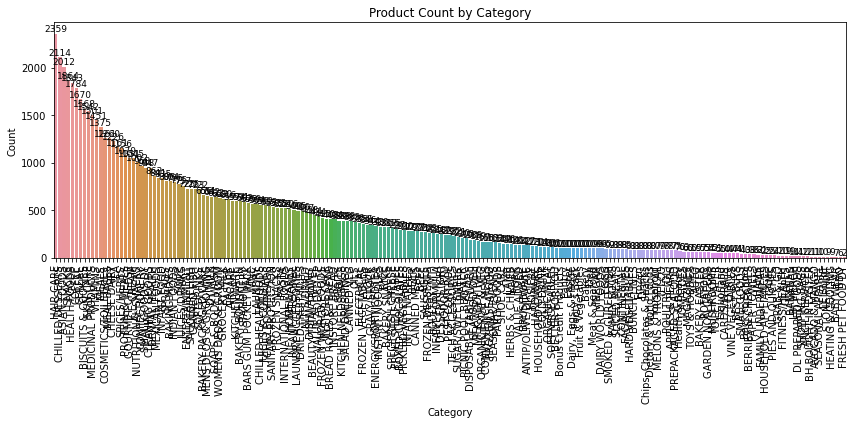

In [73]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=merged_df, x='category', order=merged_df['category'].value_counts().index)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,  # x, y position
            str(count), ha='center', va='bottom', fontsize=9)

plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

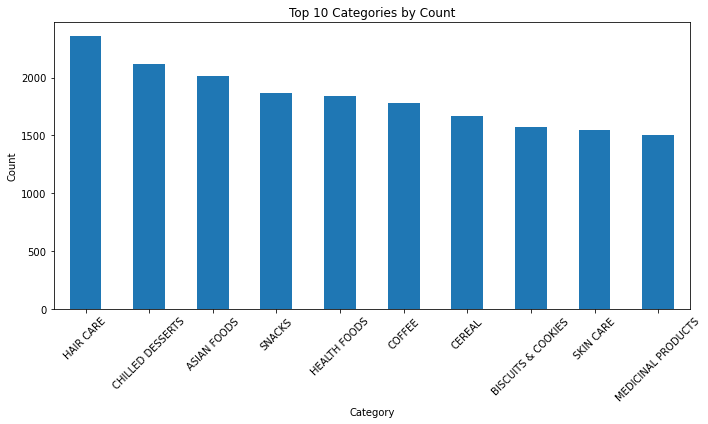

In [78]:
top_categories = merged_df['category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
merged_df.to_csv('merged_data.csv')

In [80]:
merged_df.isna().sum()

_id                     0
product_code            0
category                0
item_name               0
best_price              0
best_unit_price     77053
item_price              0
unit_price           2237
price_was           77641
special_text        69680
promo_text          59274
link                    0
brand                   0
item_size           66683
unit_weight          2238
similarity_score        0
dtype: int64

In [30]:
# load merged.csv
file_name = 'merged_data.csv'
data = pd.read_csv(file_name, index_col=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
data.columns

Index(['Unnamed: 0', '_id', 'product_code', 'category', 'item_name',
       'best_price', 'best_unit_price', 'item_price', 'unit_price',
       'price_was', 'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight', 'similarity_score'],
      dtype='object')

In [32]:
df = data.drop(columns=['Unnamed: 0'], errors='ignore')

In [33]:
df.columns

Index(['_id', 'product_code', 'category', 'item_name', 'best_price',
       'best_unit_price', 'item_price', 'unit_price', 'price_was',
       'special_text', 'promo_text', 'link', 'brand', 'item_size',
       'unit_weight', 'similarity_score'],
      dtype='object')

Remove unnecessary columns:
- '_id'
- 'price_was'
- 'special_text' 
- 'promo_text' 
- 'link' 
- 'best_unit_price'
- 'best_price'

In [34]:
df = df.drop(columns=['_id', 'price_was','special_text', 'promo_text', 'link', 'best_unit_price', 'best_price'])

In [35]:
#rearrange column order
order = ['product_code', 'category', 'item_name', 'brand', 'item_price', 'item_size', 'unit_price','unit_weight', 'similarity_score']
data = df[order]

In [36]:
data.head()

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score
0,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373
2,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,Coles,4.4,9 Pack,0.49,1ea,0.198373
3,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,Cadbury,6.7,114g,5.88,100g,0.214731
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373


In [37]:
coles_new = pd.read_csv('coles_new.csv')

In [38]:
coles_new.shape

(20604, 11)

In [39]:
coles_new.columns

Index(['product_code', 'category', 'item_name', 'essential_flag ',
       'item_name ', 'Unnamed: 5', 'subcat', 'item_price', 'unit_price',
       'brand_name', ' weights'],
      dtype='object')

In [40]:
coles_brand_names = list(coles_new['brand_name'].unique())

In [41]:
coles_new.head()

,product_code,category,item_name,essential_flag,item_name,Unnamed: 5,subcat,item_price,unit_price,brand_name,weights
0,4174794,Meat & Seafood,Coles Boneless Pork Leg Roast | approx 2.1kg,1,Boneless Pork Leg Roast,NaN,Pork,14.7,7.001,Coles,approx 2.1kg
1,9224255,Meat & Seafood,Cleaver's Organic Grass-Fed Premium Beef Mince...,1,Grass-Fed Premium Beef Mince,NaN,Beef,14.0,28.001,Cleaver's Organic,500g
2,9223332,Meat & Seafood,Cleaver's Organic Grass-Fed Extra Lean Beef Mi...,1,Grass-Fed Extra Lean Beef Mince,NaN,Beef,15.0,30.001,Cleaver's Organic,500g
3,7382539,Meat & Seafood,The Bare Bird Chicken Thigh Fillets | 480g,1,Bird Chicken Thigh Fillets,NaN,Chicken,13.0,27.081,The Bare,480g
4,3091126,Meat & Seafood,The Bare Bird Whole Chicken | approx 1.6kg,1,Bird Whole Chicken,NaN,Chicken,13.6,8.501,The Bare,approx 1.6kg


In [42]:
sub_categories = list(coles_new['subcat'].unique())

In [43]:
len(sub_categories)

129

In [44]:
def get_subcat(item_name):
    if not isinstance(item_name, str):
        return "Unknown"
    
    item_name_lower = item_name.lower()

    for subcat in sub_categories:
        if subcat.lower() in item_name_lower:
            return subcat  # return the original-cased brand
    return "Unknown"

## Use predefined Subcat from coles.csv to extract subcategories

In [45]:
data['subcat'] = data['item_name'].apply(get_subcat)

<ipython-input-45-0344954ad8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subcat'] = data['item_name'].apply(get_subcat)


In [46]:
data.head()

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat
0,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Fruit
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Unknown
2,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,Coles,4.4,9 Pack,0.49,1ea,0.198373,Fruit
3,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,Cadbury,6.7,114g,5.88,100g,0.214731,Milk
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Unknown


In [47]:
data.isna().sum()

product_code            0
category                0
item_name               0
brand                   0
item_price              0
item_size           66683
unit_price           2237
unit_weight          2238
similarity_score        0
subcat                  0
dtype: int64

In [48]:
data['unit_weight'].unique()

array(['1ea', '100g', '10ml', '10g', '1kg', '1l', '100ml', '10', '100',
       '1', '100ea', nan, '100gwas', '1kgwas', '100eawas', '1L', '100mL',
       '1M', '10mL', '1kgM'], dtype=object)

In [24]:
data['item_size'].unique()

array(['6 Pack', '9 Pack', '114g', '545g', '300g', '266g', '165g', '55g',
       '9.7mL', '28g', '7.2mL', '9.5mL', '1.74kg', '500g', '200g', '2L',
       '700g', '180g', '155g', '150g', '95g', '460g', '700mL', '330g',
       '400GRAM', '1kg', '350g', '40g', '306g', '375g', '395g', '24 pack',
       '95 GRAM', '30 pack', '900mL', '50 pack', '90g', '6mL', '2.8kg',
       '2.1kg', '112g', '1.2kg', '1 each', '125g', '650g', '240g', '750g',
       '288g', '4 pack', '600g', '1 Each', '4L', '16 pack', '9mL', '170g',
       '850g', '250g', '1.8kg', '4 Pack', '10 pack', '445 GRAM', '425g',
       '31 pack', '820g', '8mL', '1.4kg', '400g', '6g', '230g', '100g',
       '1 pack', '3 pack', '1L', '1KG', '235g', '160 GRAM', '360g',
       '220g', '120g', '65g', '210g', '190g', '340g', '600mL', '390mL',
       '400mL', '544mL', '475mL', '264mL', '1 Pack', '500mL', '14 pack',
       '0.4g', '120 pack', '312g', '243g', '187g', '80g', '60g', '63g',
       '40 pack', '900g', '160g', '466g', '185g', '6 pa

In [17]:
# Keep rows where item_size contains 'pack' (case-insensitive)
df_packs = df[df['item_size'].str.contains('pack', case=False, na=False)]

# If you only want the item name and size columns
df_packs = df_packs[['item_name', 'item_size']]

In [27]:
names = df_packs['item_name'].unique().tolist()

In [28]:
names

['Coles Hot Cross Buns Traditional Fruit | 6 Pack',
 'Coles Hot Cross Buns Choc Chip | 6 Pack',
 'Coles Hot Cross Buns Traditional Fruit Mini | 9 Pack',
 'Coles Hot Cross Buns Apple & Cinnamon | 6 Pack',
 'Coles Spring Water 24X600mL | 24 pack',
 'Pepsi Max No Sugar Cola Soft Drink Cans Multipack 375mL x 30 Pack | 30 pack',
 'OMO Ultimate 3 in 1 Laundry Capsules 50 Washes | 50 pack',
 'Fever-Tree Premium Mixers Light Meditteranean T ... 4 pack',
 'Tide Laundry 3 In 1 Pods Original | 16 pack',
 'Danone The Ultimate Black Cherry Yoghurt 4x115g | 4 pack',
 'Danone The Ultimate Golden Honey Yoghurt 4x115g | 4 Pack',
 'Illy Espresso Classico Capsules | 10 pack',
 'Solo Thirst Crusher Original Lemon Soft Drink Cans Multipack  ... 30 pack',
 'Pepsi Cola Soft Drink Cans Multipack 375mL x 30 Pack | 30 pack',
 'OMO Touch of Comfort 3 in 1 Laundry Capsules 50 Washes | 50 pack',
 'Tide Laundry 3 In 1 Pods Original | 31 pack',
 'Schweppes Lemonade Soft Drink Cans Multipack 375mL x 30 Pack | 30 pack

<ipython-input-38-ca30711aa4cf>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


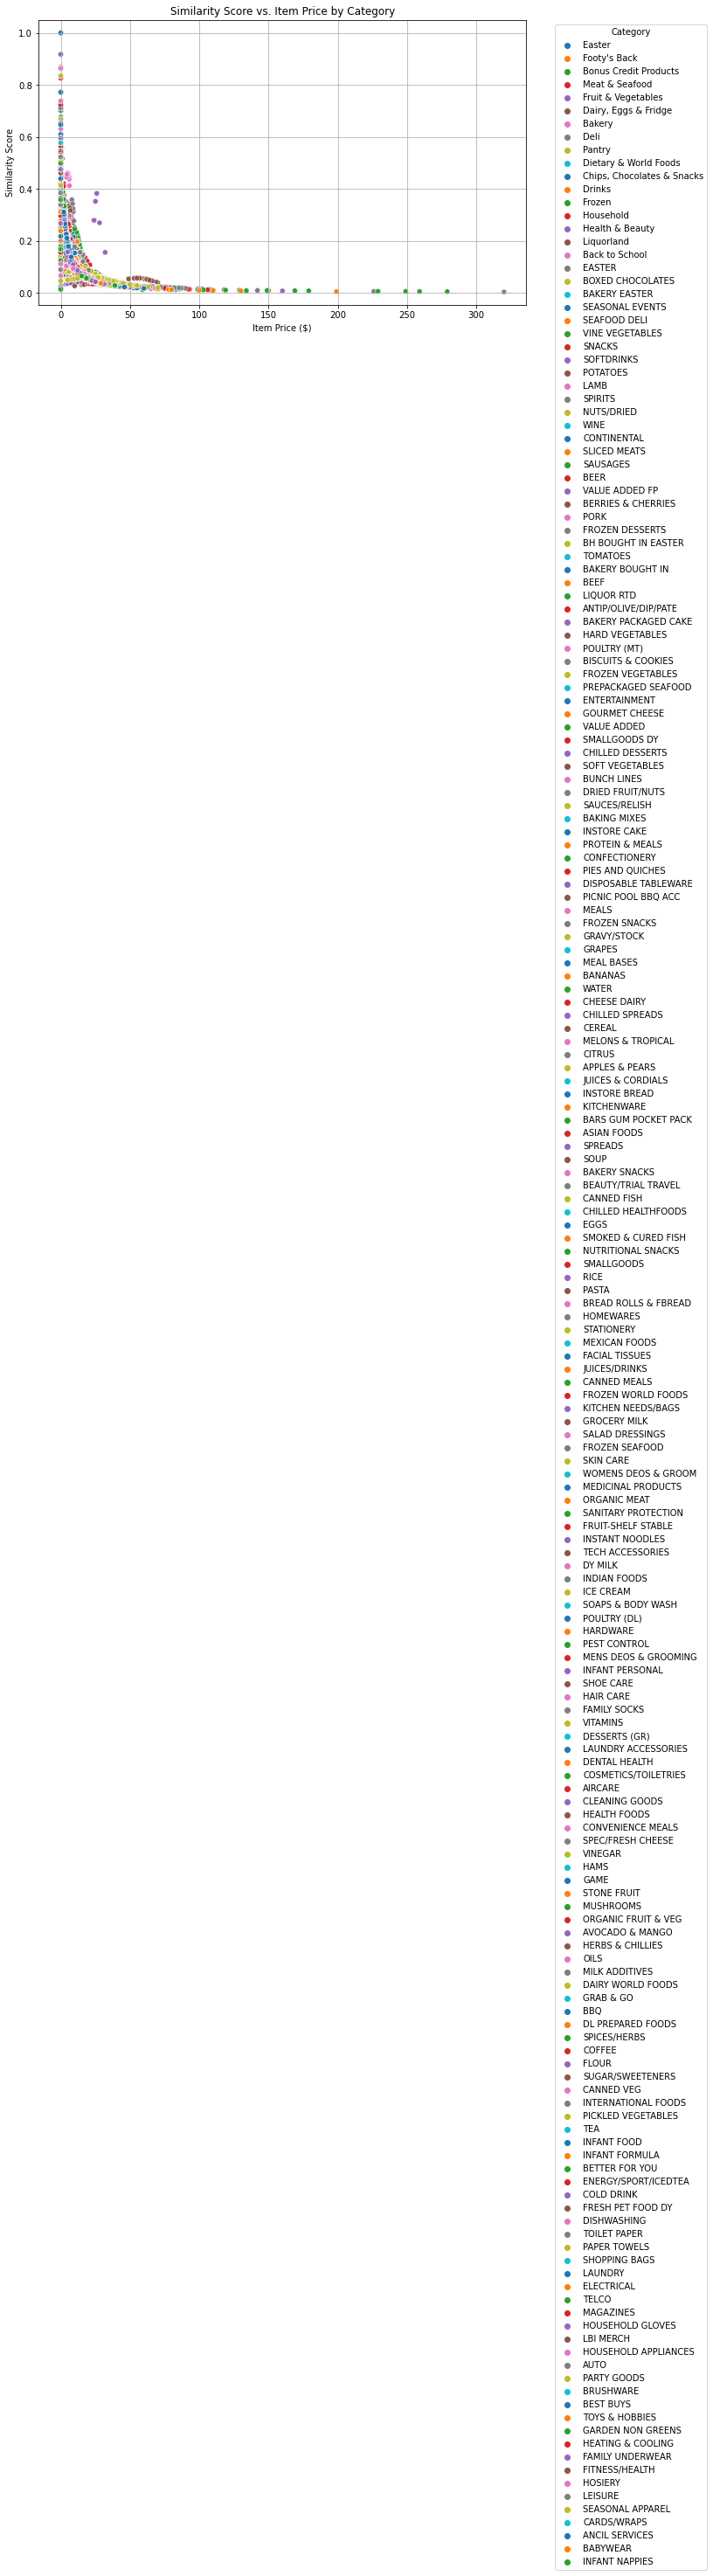

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample check: make sure required columns exist
assert all(col in df.columns for col in ['item_price', 'similarity_score', 'category'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='item_price', y='similarity_score', hue='category', palette='tab10')

plt.title('Similarity Score vs. Item Price by Category')
plt.xlabel('Item Price ($)')
plt.ylabel('Similarity Score')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [24]:
data.columns

Index(['product_code', 'category', 'item_name', 'brand', 'item_price',
       'item_size', 'unit_price', 'unit_weight', 'similarity_score', 'subcat',
       'unit_weight_new', 'unit_weight_type'],
      dtype='object')

In [25]:
data.head()

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type
0,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Fruit,1.0,ea
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Unknown,1.0,ea
2,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,Coles,4.4,9 Pack,0.49,1ea,0.198373,Fruit,1.0,ea
3,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,Cadbury,6.7,114g,5.88,100g,0.214731,Milk,100.0,g
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Unknown,1.0,ea


## Extract weight unit

In [49]:
def extract_weight_unit_unified(value):
    """
    Handles both single-value sizes (e.g. '16g', '25mL') 
    and pack-style sizes (e.g. '24x375mL').
    Returns (total_weight, unit).
    """
    if pd.isna(value):
        return (np.nan, np.nan)
    
    text = str(value).strip()

    # Case 1: Pack-style e.g. '24x375mL'
    match_pack = re.search(r'(\d+)\s*[xX]\s*([\d\.]+)\s*([a-zA-Z]+)', text)
    if match_pack:
        count = int(match_pack.group(1))
        per_unit_qty = float(match_pack.group(2))
        unit = match_pack.group(3).lower()
        return count * per_unit_qty, unit

    # Case 2: Single-value e.g. '16g', '25mL'
    match_single = re.match(r'([\d\.]+)\s*([a-zA-Z]+)', text)
    if match_single:
        qty = float(match_single.group(1))
        unit = match_single.group(2).lower()
        return qty, unit

    return np.nan, np.nan

In [50]:
data[['unit_weight_new', 'unit_weight_type']] = data['unit_weight'].apply(lambda x: pd.Series(extract_weight_unit_unified(x)))
data[['item_weight_new', 'item_weight_type']] = data['item_size'].apply(lambda x: pd.Series(extract_weight_unit_unified(x)))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [51]:
data[['unit_weight_new', 'unit_weight_type']]

,unit_weight_new,unit_weight_type
0,1.0,ea
1,1.0,ea
2,1.0,ea
3,100.0,g
4,1.0,ea
...,...,...
77828,100.0,g
77829,100.0,g
77830,100.0,g
77831,100.0,g


In [52]:
data[['item_weight_new', 'item_weight_type']]

,item_weight_new,item_weight_type
0,6.0,pack
1,6.0,pack
2,9.0,pack
3,114.0,g
4,6.0,pack
...,...,...
77828,NaN,NaN
77829,NaN,NaN
77830,NaN,NaN
77831,NaN,NaN


In [54]:
data.loc[data['item_size'] == '24x375mL', ['item_size', 'item_weight_new', 'item_weight_type']]

,item_size,item_weight_new,item_weight_type
1498,24x375mL,9000.0,ml
1499,24x375mL,9000.0,ml
1655,24x375mL,9000.0,ml
1656,24x375mL,9000.0,ml
13329,24x375mL,9000.0,ml
13347,24x375mL,9000.0,ml
13418,24x375mL,9000.0,ml
13668,24x375mL,9000.0,ml
35265,24x375mL,9000.0,ml
35338,24x375mL,9000.0,ml


In [55]:
data['item_weight_type'].unique()

array(['pack', 'g', 'ml', 'kg', 'l', 'gram', 'each', nan, 'cm', 'pk',
       'multipack', 'mm'], dtype=object)

In [56]:
data[data['item_weight_type']=='mm']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type
45702,3653113,MEDICINAL PRODUCTS,Blister Plastics 44x69mm,Blister Plastics 44x69mm,0.0,44x69mm,1.80,1ea,0.217882,Unknown,1.0,ea,3036.0,mm
45758,8415269,MEDICINAL PRODUCTS,Extra Care Hydrogel Medistrips 75x75mm,Unknown,0.0,75x75mm,2.67,1ea,0.217882,Unknown,1.0,ea,5625.0,mm
74494,3653113,MEDICINAL PRODUCTS,Blister Plastics 44x69mm,Blister Plastics 44x69mm,0.0,44x69mm,1.80,1ea,0.217882,Unknown,1.0,ea,3036.0,mm
75560,8415269,MEDICINAL PRODUCTS,Extra Care Hydrogel Medistrips 75x75mm,Unknown,0.0,75x75mm,2.67,1ea,0.217882,Unknown,1.0,ea,5625.0,mm


In [57]:
data['unit_weight_type'].unique()

array(['ea', 'g', 'ml', 'kg', 'l', nan, 'gwas', 'kgwas', 'eawas', 'm',
       'kgm'], dtype=object)

In [60]:
data.loc[data['unit_weight_type'] == 'm', ['item_name', 'unit_weight', 'unit_weight_new', 'unit_weight_type']]

,item_name,unit_weight,unit_weight_new,unit_weight_type
2659,Wrap Foil,1M,1.0,m
2831,Cling Wrap,1M,1.0,m
2949,Alfoil Traditional Strength 30cm,1M,1.0,m
3241,Cling Wrap 60m x 33cm,1M,1.0,m
4062,Aluminium Foil Wrap,1M,1.0,m
...,...,...,...,...
76855,Waterproof Kinesiology Tape,1M,1.0,m
76882,Conforming Bandage,1M,1.0,m
76959,First Aid Non-Irritating Paper Tape 2.5Cm x 9.1m,1M,1.0,m
76996,Cohesive Compression Wrap 75MM,1M,1.0,m


'm' is meters

In [61]:
data.loc[data['unit_weight_type'] == 'kgm', ['item_name', 'unit_weight', 'unit_weight_new', 'unit_weight_type']]

,item_name,unit_weight,unit_weight_new,unit_weight_type
41840,Super Tuff,1kgM,1.0,kgm
42068,Party Feet Heel Shield,1kgM,1.0,kgm


In [67]:
data.loc[data['unit_weight_type'] == 'kgm', ['item_name', 'item_size', 'item_weight_new', 'item_weight_type']]

,item_name,item_size,item_weight_new,item_weight_type
41840,Super Tuff,NaN,NaN,NaN
42068,Party Feet Heel Shield,NaN,NaN,NaN


In [68]:
data.loc[data['unit_weight_type'] == 'm', ['item_name', 'item_size', 'item_weight_new', 'item_weight_type']]

,item_name,item_size,item_weight_new,item_weight_type
2659,Wrap Foil,NaN,NaN,NaN
2831,Cling Wrap,NaN,NaN,NaN
2949,Alfoil Traditional Strength 30cm,NaN,NaN,NaN
3241,Cling Wrap 60m x 33cm,NaN,NaN,NaN
4062,Aluminium Foil Wrap,NaN,NaN,NaN
...,...,...,...,...
76855,Waterproof Kinesiology Tape,NaN,NaN,NaN
76882,Conforming Bandage,NaN,NaN,NaN
76959,First Aid Non-Irritating Paper Tape 2.5Cm x 9.1m,NaN,NaN,NaN
76996,Cohesive Compression Wrap 75MM,NaN,NaN,NaN


## Convert to standard units 

In [64]:
# get standard unit names
units_to_map = {'ea': 'each', 'gram': 'g', 'pk': 'pack', 'gwas': 'g', 'kgwas': 'kg', 'eawas': 'each'}

data['unit_weight_type'] = data['unit_weight_type'].replace(units_to_map)
data['item_weight_type'] = data['item_weight_type'].replace(units_to_map)

<ipython-input-64-281179e86d05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unit_weight_type'] = data['unit_weight_type'].replace(units_to_map)
<ipython-input-64-281179e86d05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_weight_type'] = data['item_weight_type'].replace(units_to_map)


In [65]:
data['unit_weight_type'].unique()

array(['each', 'g', 'ml', 'kg', 'l', nan, 'm', 'kgm'], dtype=object)

In [66]:
data['item_weight_type'].unique()

array(['pack', 'g', 'ml', 'kg', 'l', 'each', nan, 'cm', 'multipack', 'mm'],
      dtype=object)

Standardize weights:
- kg -> g
- l -> ml
- m -> cm
- mm -> cm

## Standardize weights

In [69]:
def standardize_units(qty, unit):
    """
    Convert qty+unit into a standardized value.
    - g for weight
    - mL for volume
    - m for length
    """
    if pd.isna(qty) or pd.isna(unit):
        return np.nan, np.nan
    
    unit = unit.lower()
    
    # Weight
    if unit in ["g", "gram", "grams"]:
        return qty, "g"
    elif unit in ["kg", "kilogram", "kilograms"]:
        return qty * 1000, "g"
    
    # Volume
    elif unit in ["ml", "millilitre", "milliliter"]:
        return qty, "ml"
    elif unit in ["l", "litre", "liter"]:
        return qty * 1000, "ml"
    
    # Length
    elif unit in ["m"]:
        return qty, "m"
    elif unit in ["cm"]:
        return qty / 100, "m"
    elif unit in ["mm"]:
        return qty / 1000, "m"
    
    else:
        # Unknown unit → leave as is
        return qty, unit

In [70]:
data[["std_item_weight", "std_item_unit"]] = data.apply(
    lambda row: standardize_units(row["item_weight_new"], row["item_weight_type"]), 
    axis=1, result_type="expand"
)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [71]:
data[["item_name","item_size", "item_weight_new", "item_weight_type","std_item_weight", "std_item_unit"]]

,item_name,item_size,item_weight_new,item_weight_type,std_item_weight,std_item_unit
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,6 Pack,6.0,pack,6.0,pack
1,Coles Hot Cross Buns Choc Chip | 6 Pack,6 Pack,6.0,pack,6.0,pack
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,9 Pack,9.0,pack,9.0,pack
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,114g,114.0,g,114.0,g
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,6 Pack,6.0,pack,6.0,pack
...,...,...,...,...,...,...
77828,Veggie Tubes Sweetcorn & Carrot 12m+,NaN,NaN,NaN,NaN,NaN
77829,100% Pure Cotton Ripple,NaN,NaN,NaN,NaN,NaN
77830,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,NaN,NaN,NaN,NaN,NaN
77831,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,NaN,NaN,NaN,NaN,NaN


In [72]:
data.isna().sum()

product_code            0
category                0
item_name               0
brand                   0
item_price              0
item_size           66683
unit_price           2237
unit_weight          2238
similarity_score        0
subcat                  0
unit_weight_new      2244
unit_weight_type     2244
item_weight_new     66683
item_weight_type    66683
std_item_weight     66683
std_item_unit       66683
dtype: int64

## Check for items that does not have a weight

In [73]:
data[data['item_size'].isna()]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1460,1113465,EASTER,Chocolate Easter Bunny,Chocolate Easter Bunny,8.0,NaN,4.00,100g,0.171870,Unknown,100.0,g,NaN,NaN,NaN,NaN
1461,4886751,EASTER,Selections Easter Chocolate Eggs Bag,Selections Easter Chocolate,11.5,NaN,3.48,100g,0.170491,Unknown,100.0,g,NaN,NaN,NaN,NaN
1462,4898604,EASTER,Easter Gold Bunny Milk Chocolate,Unknown,18.0,NaN,6.25,100g,0.103036,Milk,100.0,g,NaN,NaN,NaN,NaN
1463,5766234,EASTER,Chocolate Easter Hunt Assortment Pack,Unknown,17.5,NaN,2.40,100g,0.106898,Unknown,100.0,g,NaN,NaN,NaN,NaN
1464,4885191,EASTER,Dairy Milk Easter Chocolate Eggs Bag,Dairy Milk Easter,6.7,NaN,3.51,100g,0.160387,Milk,100.0,g,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,4163437,INFANT FOOD,Veggie Tubes Sweetcorn & Carrot 12m+,Unknown,0.0,NaN,16.67,100g,0.439613,Unknown,100.0,g,NaN,NaN,NaN,NaN
77829,3754198,INFANT PERSONAL,100% Pure Cotton Ripple,Unknown,0.0,NaN,1.95,100g,0.267265,Unknown,100.0,g,NaN,NaN,NaN,NaN
77830,6295520,INFANT FOOD,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,Unknown,0.0,NaN,1.33,100g,0.439613,Beef,100.0,g,NaN,NaN,NaN,NaN
77831,6295585,INFANT FOOD,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,Polenta,0.0,NaN,1.33,100g,0.439613,Lamb,100.0,g,NaN,NaN,NaN,NaN


In [74]:
data[data['item_size'].isna() & data['unit_weight'].isna()]  # both item size and unit weight are missing

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1753,3655141,EASTER,Easter Belgian Milk Choc Pops,Unknown,0.0,NaN,NaN,NaN,0.089724,Milk,NaN,NaN,NaN,NaN,NaN,NaN
2164,3121431,KITCHENWARE,Roasting Pan,Roasting Pan,0.0,NaN,NaN,NaN,0.267393,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2369,3121453,KITCHENWARE,Roasting Pan with Rack,Roasting Pan,0.0,NaN,NaN,NaN,0.267393,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2556,7208484,STATIONERY,A4 Copy Paper 500 Sheets,A4 Copy Paper,0.0,NaN,NaN,NaN,0.141170,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3045,5880626,TECH ACCESSORIES,1.2M USB-A To Lightning Cable White,1.2M USB-A To,0.0,NaN,NaN,NaN,0.156810,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72473,3782863,STATIONERY,Blu Tack Colour,Blu Tack,4.0,NaN,NaN,NaN,0.157536,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
72478,9053888,SEASONAL EVENTS,Saver,Saver,0.0,NaN,NaN,NaN,0.182327,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
72479,8471678,ANCIL SERVICES,$1 donation,$1 donation,0.0,NaN,NaN,NaN,1.000000,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
75354,9198202,BEST BUYS,Massage Pillow,Unknown,0.0,NaN,NaN,NaN,1.000000,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


Below are the categories of the instances where both the item size and unit weight is missing.

In [75]:
data.loc[data['item_size'].isna() & data['unit_weight'].isna(), 'category'].unique()

array(['EASTER', 'KITCHENWARE', 'STATIONERY', 'TECH ACCESSORIES',
       'HARDWARE', 'SHOE CARE', 'CHEESE DAIRY', 'FAMILY SOCKS',
       'HERBS & CHILLIES', 'SHOPPING BAGS', 'MAGAZINES', 'LBI MERCH',
       'SEASONAL EVENTS', 'ELECTRICAL', 'AUTO', 'HOUSEHOLD APPLIANCES',
       'TELCO', 'BEST BUYS', 'TOYS & HOBBIES', 'GARDEN NON GREENS',
       'HEATING & COOLING', 'FAMILY UNDERWEAR', 'FITNESS/HEALTH',
       'BRUSHWARE', 'PICNIC POOL BBQ ACC', 'HOSIERY', 'LEISURE',
       'SEASONAL APPAREL', 'CARDS/WRAPS', 'PARTY GOODS', 'ANCIL SERVICES',
       'BABYWEAR', 'HAIR CARE'], dtype=object)

In [80]:
data.loc[data['item_size'].isna() & data['unit_weight'].isna(), 'item_name'].unique()

array(['Easter Belgian Milk Choc Pops', 'Roasting Pan',
       'Roasting Pan with Rack', 'A4 Copy Paper 500 Sheets',
       '1.2M USB-A To Lightning Cable White', 'Wall Charger Dual USB-C',
       'Escape True Wireless Sport Ear Buds', 'Blu Tack',
       'Wired Earphones With Mic Lightning',
       'Boostup 30w Usb C Pd Wall Charger', 'Combination Word 40mm',
       '1.2M USB-A To USB-C Cable Black',
       '42w (Pd30w Pps Usb-C & 12w Usb-A) Universal Wall Charger',
       'Boostcharge USB-A To USB-C Cable- 1M Black', 'Blu Tack Colour',
       'Car Mobile Phone Holder', 'Diamond Padlock Long Shackle 40mm',
       'Wireless Mouse', '2M USB-C To USB C Cable - Black', 'School Glue',
       'Sticky tape 18mmx25m', 'Lint Roller',
       '1.2M USB-C To USB-C Cable Black Braided',
       'Lightning To 3.5Mm Audio Adapter',
       '2M USB-A To USB-C Cable Black', 'Fluo XL Assorted Highlighters',
       '4 Colour Pens', 'Boss Highlighter Assorted Fluoro',
       'Car Charger Dual USB-C',
      

We can observe that, these items do not require specific weight conditions for price changes when purchasing these items. Therefore, we can use the unit weight as the item weight here.

Below are the instances where item size is not available but the unit weight is available.

In [78]:
data[data['item_size'].isna() & data['unit_weight'].notna()]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1460,1113465,EASTER,Chocolate Easter Bunny,Chocolate Easter Bunny,8.0,NaN,4.00,100g,0.171870,Unknown,100.0,g,NaN,NaN,NaN,NaN
1461,4886751,EASTER,Selections Easter Chocolate Eggs Bag,Selections Easter Chocolate,11.5,NaN,3.48,100g,0.170491,Unknown,100.0,g,NaN,NaN,NaN,NaN
1462,4898604,EASTER,Easter Gold Bunny Milk Chocolate,Unknown,18.0,NaN,6.25,100g,0.103036,Milk,100.0,g,NaN,NaN,NaN,NaN
1463,5766234,EASTER,Chocolate Easter Hunt Assortment Pack,Unknown,17.5,NaN,2.40,100g,0.106898,Unknown,100.0,g,NaN,NaN,NaN,NaN
1464,4885191,EASTER,Dairy Milk Easter Chocolate Eggs Bag,Dairy Milk Easter,6.7,NaN,3.51,100g,0.160387,Milk,100.0,g,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,4163437,INFANT FOOD,Veggie Tubes Sweetcorn & Carrot 12m+,Unknown,0.0,NaN,16.67,100g,0.439613,Unknown,100.0,g,NaN,NaN,NaN,NaN
77829,3754198,INFANT PERSONAL,100% Pure Cotton Ripple,Unknown,0.0,NaN,1.95,100g,0.267265,Unknown,100.0,g,NaN,NaN,NaN,NaN
77830,6295520,INFANT FOOD,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,Unknown,0.0,NaN,1.33,100g,0.439613,Beef,100.0,g,NaN,NaN,NaN,NaN
77831,6295585,INFANT FOOD,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,Polenta,0.0,NaN,1.33,100g,0.439613,Lamb,100.0,g,NaN,NaN,NaN,NaN


Below are the categories of instances where item size is not available but the unit weight is available.

In [79]:
data.loc[data['item_size'].isna() & data['unit_weight'].notna(), 'category'].unique()

array(['EASTER', 'BOXED CHOCOLATES', 'BAKERY EASTER', 'SEASONAL EVENTS',
       'SEAFOOD DELI', 'VINE VEGETABLES', 'SNACKS', 'POTATOES', 'LAMB',
       'NUTS/DRIED', 'CONTINENTAL', 'SLICED MEATS', 'SAUSAGES',
       'VALUE ADDED FP', 'BERRIES & CHERRIES', 'PORK', 'FROZEN DESSERTS',
       'BH BOUGHT IN EASTER', 'TOMATOES', 'BAKERY BOUGHT IN', 'BEEF',
       'ANTIP/OLIVE/DIP/PATE', 'BAKERY PACKAGED CAKE', 'HARD VEGETABLES',
       'POULTRY (MT)', 'BISCUITS & COOKIES', 'FROZEN VEGETABLES',
       'PREPACKAGED SEAFOOD', 'ENTERTAINMENT', 'GOURMET CHEESE',
       'VALUE ADDED', 'SMALLGOODS DY', 'SOFTDRINKS', 'CHILLED DESSERTS',
       'SOFT VEGETABLES', 'BUNCH LINES', 'DRIED FRUIT/NUTS', 'WINE',
       'SAUCES/RELISH', 'BAKING MIXES', 'INSTORE CAKE', 'PROTEIN & MEALS',
       'CONFECTIONERY', 'PIES AND QUICHES', 'DISPOSABLE TABLEWARE',
       'PICNIC POOL BBQ ACC', 'MEALS', 'FROZEN SNACKS', 'GRAVY/STOCK',
       'GRAPES', 'MEAL BASES', 'BANANAS', 'CHEESE DAIRY',
       'CHILLED SPREADS', 'C

In [82]:
data.loc[data['item_size'].isna() & data['unit_weight'].notna(), 'item_name'].unique()

17043

## Make NaN item weights using unit weights

This fill the NaN item weights of items where the unit weight is available.

In [83]:
# Fill item_weight_new with unit_weight where item_weight_new is NaN
data.loc[data['item_weight_new'].isna() & data['unit_weight'].notna(), 'item_weight_new'] = \
    data['unit_weight_new']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [85]:
data[['item_name','item_size','item_weight_new','unit_weight']]

,item_name,item_size,item_weight_new,unit_weight
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,6 Pack,6.0,1ea
1,Coles Hot Cross Buns Choc Chip | 6 Pack,6 Pack,6.0,1ea
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,9 Pack,9.0,1ea
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,114g,114.0,100g
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,6 Pack,6.0,1ea
...,...,...,...,...
77828,Veggie Tubes Sweetcorn & Carrot 12m+,NaN,100.0,100g
77829,100% Pure Cotton Ripple,NaN,100.0,100g
77830,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,NaN,100.0,100g
77831,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,NaN,100.0,100g


In [86]:
data.loc[data['item_size'].isna() & data['unit_weight'].notna(), 'item_weight_type'] = \
    data['unit_weight_type']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [87]:
data[['item_name','item_size','item_weight_new','unit_weight','item_weight_type']]

,item_name,item_size,item_weight_new,unit_weight,item_weight_type
0,Coles Hot Cross Buns Traditional Fruit | 6 Pack,6 Pack,6.0,1ea,pack
1,Coles Hot Cross Buns Choc Chip | 6 Pack,6 Pack,6.0,1ea,pack
2,Coles Hot Cross Buns Traditional Fruit Mini | ...,9 Pack,9.0,1ea,pack
3,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,114g,114.0,100g,g
4,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,6 Pack,6.0,1ea,pack
...,...,...,...,...,...
77828,Veggie Tubes Sweetcorn & Carrot 12m+,NaN,100.0,100g,g
77829,100% Pure Cotton Ripple,NaN,100.0,100g,g
77830,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,NaN,100.0,100g,g
77831,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,NaN,100.0,100g,g


In [77]:
data[data['subcat']=='Unknown']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.40,6 Pack,0.73,1ea,0.198373,Unknown,1.0,each,6.0,pack,6.0,pack
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.40,6 Pack,0.73,1ea,0.198373,Unknown,1.0,each,6.0,pack,6.0,pack
5,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,Cadbury,13.00,545g,2.39,100g,0.135630,Unknown,100.0,g,545.0,g,545.0,g
6,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,Greens,6.00,300g,2.00,100g,0.213812,Unknown,100.0,g,300.0,g,300.0,g
8,5854717,Footy's Back,Mcvities Digestives Biscuits Dark Chocolate | ...,Mcvities Digestives,2.75,266g,1.03,100g,0.271592,Unknown,100.0,g,266.0,g,266.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77824,8421115,INFANT FOOD,Organic Tangy Tomato Chickpea Waves,Unknown,7.50,NaN,7.81,100g,0.138376,Unknown,100.0,g,NaN,NaN,NaN,NaN
77826,8988935,INFANT FOOD,Carrots Red Lentils & Cheddar Baby Food Pouch ...,Unknown,0.00,NaN,1.92,100g,0.439613,Unknown,100.0,g,NaN,NaN,NaN,NaN
77827,3292911,INFANT FOOD,Little Rollies Hazelnut,Unknown,0.00,NaN,8.00,100g,0.439613,Unknown,100.0,g,NaN,NaN,NaN,NaN
77828,4163437,INFANT FOOD,Veggie Tubes Sweetcorn & Carrot 12m+,Unknown,0.00,NaN,16.67,100g,0.439613,Unknown,100.0,g,NaN,NaN,NaN,NaN


Below plot shows the categories in which both the item size and unt weight size is not available.

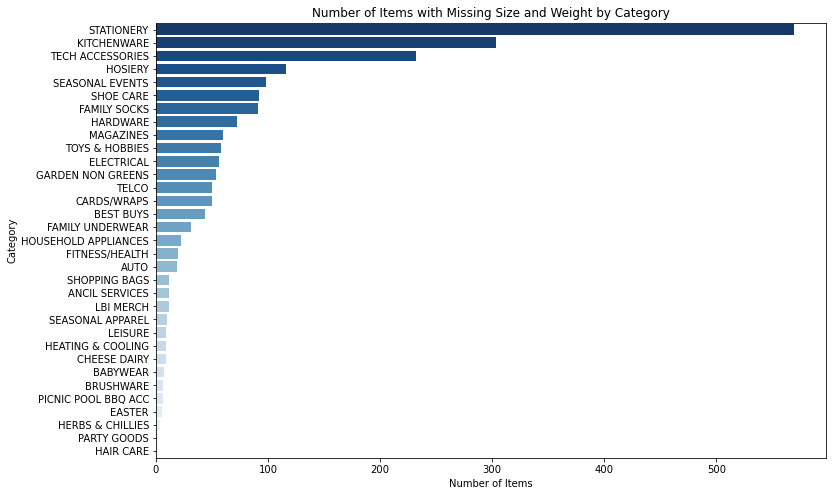

In [89]:
category_count_of_non_weights = data.loc[data['item_size'].isna() & data['unit_weight'].isna(), 'category'].value_counts()
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=category_count_of_non_weights.values, y=category_count_of_non_weights.index, palette="Blues_r")
plt.xlabel('Number of Items')
plt.ylabel('Category')
plt.title('Number of Items with Missing Size and Weight by Category')
plt.show()

In [101]:
category_count_of_non_weights

STATIONERY              569
KITCHENWARE             303
TECH ACCESSORIES        232
HOSIERY                 116
SEASONAL EVENTS          98
SHOE CARE                92
FAMILY SOCKS             91
HARDWARE                 72
MAGAZINES                60
TOYS & HOBBIES           58
ELECTRICAL               56
GARDEN NON GREENS        54
TELCO                    50
CARDS/WRAPS              50
BEST BUYS                44
FAMILY UNDERWEAR         31
HOUSEHOLD APPLIANCES     22
FITNESS/HEALTH           20
AUTO                     19
SHOPPING BAGS            12
ANCIL SERVICES           12
LBI MERCH                12
SEASONAL APPAREL         10
LEISURE                   9
HEATING & COOLING         9
CHEESE DAIRY              9
BABYWEAR                  7
BRUSHWARE                 6
PICNIC POOL BBQ ACC       6
EASTER                    5
HERBS & CHILLIES          4
PARTY GOODS               2
HAIR CARE                 2
Name: category, dtype: int64

Most products are stationeries, kitchenware, tech accessories, and hosiery.

In [90]:
# Fill subcategory with category where brand and subcategory are 'Unknown'
data.loc[(data['brand'] == 'Unknown') & (data['subcat'] == 'Unknown'), 'subcat'] = \
    data.loc[(data['brand'] == 'Unknown') & (data['subcat'] == 'Unknown'), 'category']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [91]:
data[data['subcat']=='Unknown']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.40,6 Pack,0.73,1ea,0.198373,Unknown,1.0,each,6.0,pack,6.0,pack
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.40,6 Pack,0.73,1ea,0.198373,Unknown,1.0,each,6.0,pack,6.0,pack
5,9633786,Easter,Cadbury Selections Large Easter Chocolate Eggs...,Cadbury,13.00,545g,2.39,100g,0.135630,Unknown,100.0,g,545.0,g,545.0,g
6,9077853,Easter,Greens Deluxe Jam & Cream Lamington Cake Roll ...,Greens,6.00,300g,2.00,100g,0.213812,Unknown,100.0,g,300.0,g,300.0,g
8,5854717,Footy's Back,Mcvities Digestives Biscuits Dark Chocolate | ...,Mcvities Digestives,2.75,266g,1.03,100g,0.271592,Unknown,100.0,g,266.0,g,266.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77781,3784224,INFANT PERSONAL,Training Cups Assorted,Training Cups Assorted,0.00,NaN,11.00,1ea,0.267265,Unknown,1.0,each,1.0,each,NaN,NaN
77784,3841565,INFANT PERSONAL,Replacement Straw,Replacement Straw,0.00,NaN,10.00,1ea,0.267265,Unknown,1.0,each,1.0,each,NaN,NaN
77807,6027076,INFANT FOOD,Spinach Apple Broccoli & Pea and Nothing Else ...,Broccoli,2.15,NaN,1.50,100g,0.311051,Unknown,100.0,g,100.0,g,NaN,NaN
77811,6252469,INFANT FOOD,Melts 80g,Melts 80g,0.00,80g,4.81,100g,0.439613,Unknown,100.0,g,80.0,g,80.0,g


In [92]:
data.isna().sum()

product_code            0
category                0
item_name               0
brand                   0
item_price              0
item_size           66683
unit_price           2237
unit_weight          2238
similarity_score        0
subcat                  0
unit_weight_new      2244
unit_weight_type     2244
item_weight_new      2142
item_weight_type     2142
std_item_weight     66683
std_item_unit       66683
dtype: int64

In [93]:
data[data['item_size'].isna() & data['unit_weight'].notna()]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
1460,1113465,EASTER,Chocolate Easter Bunny,Chocolate Easter Bunny,8.0,NaN,4.00,100g,0.171870,Unknown,100.0,g,100.0,g,NaN,NaN
1461,4886751,EASTER,Selections Easter Chocolate Eggs Bag,Selections Easter Chocolate,11.5,NaN,3.48,100g,0.170491,Unknown,100.0,g,100.0,g,NaN,NaN
1462,4898604,EASTER,Easter Gold Bunny Milk Chocolate,Unknown,18.0,NaN,6.25,100g,0.103036,Milk,100.0,g,100.0,g,NaN,NaN
1463,5766234,EASTER,Chocolate Easter Hunt Assortment Pack,Unknown,17.5,NaN,2.40,100g,0.106898,EASTER,100.0,g,100.0,g,NaN,NaN
1464,4885191,EASTER,Dairy Milk Easter Chocolate Eggs Bag,Dairy Milk Easter,6.7,NaN,3.51,100g,0.160387,Milk,100.0,g,100.0,g,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,4163437,INFANT FOOD,Veggie Tubes Sweetcorn & Carrot 12m+,Unknown,0.0,NaN,16.67,100g,0.439613,INFANT FOOD,100.0,g,100.0,g,NaN,NaN
77829,3754198,INFANT PERSONAL,100% Pure Cotton Ripple,Unknown,0.0,NaN,1.95,100g,0.267265,INFANT PERSONAL,100.0,g,100.0,g,NaN,NaN
77830,6295520,INFANT FOOD,Pumpkin Potato & Beef Baby Food Pouch 6+ Months,Unknown,0.0,NaN,1.33,100g,0.439613,Beef,100.0,g,100.0,g,NaN,NaN
77831,6295585,INFANT FOOD,Lamb Vegetables & Polenta Baby Food Pouch 6+ M...,Polenta,0.0,NaN,1.33,100g,0.439613,Lamb,100.0,g,100.0,g,NaN,NaN


In [97]:
data[data['category'] == 'STATIONERY']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
2556,7208484,STATIONERY,A4 Copy Paper 500 Sheets,A4 Copy Paper,0.0,NaN,NaN,NaN,0.141170,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3266,5412934,STATIONERY,Blu Tack,Blu Tack,3.1,NaN,NaN,NaN,0.155113,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3504,3782863,STATIONERY,Blu Tack Colour,Blu Tack,4.0,NaN,NaN,NaN,0.157536,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3543,3087242,STATIONERY,School Glue,School Glue,7.0,NaN,NaN,NaN,0.144920,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3564,1842556,STATIONERY,Sticky tape 18mmx25m,Sticky tape 18mmx25m,0.0,NaN,NaN,NaN,0.141170,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72404,3251142,STATIONERY,Permanent Markers Fine Tip,Markers Fine Tip,5.6,NaN,NaN,NaN,0.155627,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
72408,1840211,STATIONERY,4 Colour Pen,Unknown,3.2,NaN,NaN,NaN,0.155420,STATIONERY,NaN,NaN,NaN,NaN,NaN,NaN
72410,8799579,STATIONERY,Clear Platic Ruler 30cm,Unknown,0.0,NaN,NaN,NaN,0.141170,STATIONERY,NaN,NaN,NaN,NaN,NaN,NaN
72412,3935013,STATIONERY,A4 Writing Pad,Unknown,0.0,NaN,NaN,NaN,0.141170,STATIONERY,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse categories where item size is not available and extract subcategory

**Stationary:**

In [98]:
data[data['category'] == 'STATIONERY']['item_name'].unique()

array(['A4 Copy Paper 500 Sheets', 'Blu Tack', 'Blu Tack Colour',
       'School Glue', 'Sticky tape 18mmx25m',
       'Fluo XL Assorted Highlighters', '4 Colour Pens',
       'Boss Highlighter Assorted Fluoro',
       'Liquid Paper Dryline Grip Correction Tape',
       'A4 Notebook 120 Page', 'Metallic Markers',
       'Paper Clips In Pouch Assorted Colours', 'USB 2.0 SM02 16GB',
       'A4 Display Folder', 'Super Sticky Cube',
       '570 Notebook A5 200 Page', 'SM02 USB 2.0 Flash Drive 64GB',
       'A4 Spiral Notebook 200 Page', 'To Do List 52 Sheets',
       'Markers Fine Tip Colour Burst',
       'Kids Evolution Colouring Pencils',
       'Sticky Notes Assorted Colours', 'S-Gel Pens Assorted',
       'Laundry Marker', 'Glu Stik 21g', 'Atlantis Pens Black',
       'Letra Tag Labeller Blue', 'Correction Pen White',
       'Fineliner Pens', 'Cristal Fashion Pens', 'PVC Free Eraser',
       'A5 Spiral Notebook 200 pages', 'Intensity Colouring Felt Pens',
       'Woodcase Hb Pencils',

In [99]:
# define subcategories for Stationery
subcategory_map = {
    "paper": "Paper",
    "notebook": "Notebook",
    "binder": "Notebook/Folder",
    "folder": "Notebook/Folder",
    "pad": "Notebook/Pad",
    "pen": "Pen",
    "pencil": "Pencil",
    "marker": "Marker",
    "highlighter": "Marker",
    "eraser": "Eraser",
    "correction": "Correction",
    "glue": "Glue",
    "tack": "Adhesive",
    "tape": "Tape",
    "clip": "Clips & Pins",
    "rubber band": "Clips & Pins",
    "push pin": "Clips & Pins",
    "usb": "USB/Storage",
    "sd": "USB/Storage",
    "card": "USB/Storage",
    "scissor": "Scissors",
    "stapler": "Stapler",
    "staple": "Stapler",
    "label": "Labels",
    "envelope": "Envelope",
    "ruler": "Ruler",
    "whiteboard": "Board/Marker",
    "calculator": "Calculator",
    "sticker": "Stickers",
    "slime": "Fun/Creative Kits",
    "set": "Fun/Creative Kits",
    "kit": "Fun/Creative Kits"
}

def get_subcategory(item):
    item_lower = item.lower()
    for keyword, subcat in subcategory_map.items():
        if keyword in item_lower:
            return subcat
    return "Other"

data["subcat"] = data["item_name"].apply(get_subcategory)

<ipython-input-99-ecabb752d908>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data["item_name"].apply(get_subcategory)


In [100]:
data[data['category'] == 'STATIONERY']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
2556,7208484,STATIONERY,A4 Copy Paper 500 Sheets,A4 Copy Paper,0.0,NaN,NaN,NaN,0.141170,Paper,NaN,NaN,NaN,NaN,NaN,NaN
3266,5412934,STATIONERY,Blu Tack,Blu Tack,3.1,NaN,NaN,NaN,0.155113,Adhesive,NaN,NaN,NaN,NaN,NaN,NaN
3504,3782863,STATIONERY,Blu Tack Colour,Blu Tack,4.0,NaN,NaN,NaN,0.157536,Adhesive,NaN,NaN,NaN,NaN,NaN,NaN
3543,3087242,STATIONERY,School Glue,School Glue,7.0,NaN,NaN,NaN,0.144920,Glue,NaN,NaN,NaN,NaN,NaN,NaN
3564,1842556,STATIONERY,Sticky tape 18mmx25m,Sticky tape 18mmx25m,0.0,NaN,NaN,NaN,0.141170,Tape,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72404,3251142,STATIONERY,Permanent Markers Fine Tip,Markers Fine Tip,5.6,NaN,NaN,NaN,0.155627,Marker,NaN,NaN,NaN,NaN,NaN,NaN
72408,1840211,STATIONERY,4 Colour Pen,Unknown,3.2,NaN,NaN,NaN,0.155420,Pen,NaN,NaN,NaN,NaN,NaN,NaN
72410,8799579,STATIONERY,Clear Platic Ruler 30cm,Unknown,0.0,NaN,NaN,NaN,0.141170,Ruler,NaN,NaN,NaN,NaN,NaN,NaN
72412,3935013,STATIONERY,A4 Writing Pad,Unknown,0.0,NaN,NaN,NaN,0.141170,Notebook/Pad,NaN,NaN,NaN,NaN,NaN,NaN


**Kitchenware:**

In [102]:
data[data['category'] == 'KITCHENWARE']['item_name'].unique()

array(['Roasting Pan', 'Roasting Pan with Rack', 'Ultra Container 1.3L',
       'Ultra Container 2.7L', 'Plus Rectangle Containers 1 Litre',
       'Ultra Container 700mL', 'Ultra Container 1.4L',
       'Ultra Container 1.9L', 'Microsafe Easy Heat Containers 900mL',
       'Ultra Container 920mL', 'Microsafe Vegetable Steamer 1.5L',
       'Microsafe Containers',
       'Microsafe Easy Heat Round Container 800mL',
       'Microsafe Easy Heat Value Pack',
       'Klip It Plus Rectangle Container 1L',
       'Klip It Plus Container 180mL',
       'Microsafe Easy Heat Container 1.6L', 'Ultra Container 460mL',
       'Klip It Plus Rectangle Container 2.2L',
       'Microsafe Easy Heat Container 900mL',
       'Plus Rectangle Containers 1.15 Litre',
       'Microsafe Easy Heat Containers 375mL',
       'Plus Square Containers 520ml', 'Tellfresh Cake Storer 6L',
       'Klip It Plus Rectangle Container 400mL',
       'Klip It Plus Square Container 1.15L', 'Klip It Plus Containers',
       '

In [103]:
subcategory_map_kitchen = {
    # Cookware
    "frypan": "Cookware",
    "saute": "Cookware",
    "grill pan": "Cookware",
    "wok": "Cookware",
    "saucepan": "Cookware",
    "stock pot": "Cookware",
    "cooker": "Cookware",
    "roaster": "Cookware",
    "roasting pan": "Cookware",
    "baking dish": "Cookware",
    "oven tray": "Cookware",
    "all day pan": "Cookware",
    
    # Bakeware
    "cake pan": "Bakeware",
    "cake tin": "Bakeware",
    "brownie": "Bakeware",
    "bundt": "Bakeware",
    "quiche": "Bakeware",
    "pie dish": "Bakeware",
    "muffin": "Bakeware",
    "cupcake": "Bakeware",
    "loaf pan": "Bakeware",
    "cookie cutter": "Bakeware",
    "cookie scoop": "Bakeware",
    "cooling rack": "Bakeware",
    "pizza": "Bakeware",
    "pastry": "Bakeware",
    "rolling pin": "Bakeware",
    "baking mat": "Bakeware",
    "air fryer": "Bakeware",
    "trivet": "Bakeware",

    # Food Storage
    "container": "Food Storage",
    "storer": "Food Storage",
    "storage": "Food Storage",
    "jar": "Food Storage",
    "cereal": "Food Storage",

    # Food Prep Tools
    "chopping board": "Food Prep Tools",
    "board": "Food Prep Tools",
    "peeler": "Food Prep Tools",
    "grater": "Food Prep Tools",
    "zester": "Food Prep Tools",
    "mandoline": "Food Prep Tools",
    "spiralizer": "Food Prep Tools",
    "masher": "Food Prep Tools",
    "tenderiser": "Food Prep Tools",
    "garlic press": "Food Prep Tools",
    "dumpling press": "Food Prep Tools",
    "apple corer": "Food Prep Tools",
    "juicer": "Food Prep Tools",
    "funnel": "Food Prep Tools",
    "scoop": "Food Prep Tools",
    "ladle": "Food Prep Tools",
    "measuring": "Food Prep Tools",
    "scales": "Food Prep Tools",
    "timer": "Food Prep Tools",

    # Utensils & Gadgets
    "spoon": "Utensils & Gadgets",
    "whisk": "Utensils & Gadgets",
    "spatula": "Utensils & Gadgets",
    "turner": "Utensils & Gadgets",
    "tongs": "Utensils & Gadgets",
    "colander": "Utensils & Gadgets",
    "sieve": "Utensils & Gadgets",
    "strainer": "Utensils & Gadgets",
    "sifter": "Utensils & Gadgets",
    "egg": "Utensils & Gadgets",
    "frother": "Utensils & Gadgets",
    "mat": "Utensils & Gadgets",

    # Cutlery & Tableware
    "cutlery": "Cutlery & Tableware",
    "fork": "Cutlery & Tableware",
    "knife": "Cutlery & Tableware",
    "spoons": "Cutlery & Tableware",
    "chopstick": "Cutlery & Tableware",
    "skewer": "Cutlery & Tableware",
    "stick": "Cutlery & Tableware",
    "salt": "Cutlery & Tableware",
    "pepper": "Cutlery & Tableware",

    # Knives & Accessories
    "scissor": "Knives & Accessories",
    "sharpener": "Knives & Accessories",
    "knife organiser": "Knives & Accessories",

    # Miscellaneous
    "lighter": "Miscellaneous",
    "oil sprayer": "Miscellaneous",
    "store & shake": "Miscellaneous",
    "store & pour": "Miscellaneous",
    "bag clip": "Miscellaneous",
    "bottle opener": "Miscellaneous",
    "sink": "Miscellaneous",
    "dish rack": "Miscellaneous",
}

def get_kitchen_subcat(row):
    if row["category"].lower() == "kitchenware":
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_kitchen.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware

# apply row-wise
data["subcat"] = data.apply(get_kitchen_subcat, axis=1)

<ipython-input-103-4d3a7cd354d7>:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_kitchen_subcat, axis=1)


In [104]:
data[data['category'] == 'KITCHENWARE']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
2164,3121431,KITCHENWARE,Roasting Pan,Roasting Pan,0.0,NaN,NaN,NaN,0.267393,Cookware,NaN,NaN,NaN,NaN,NaN,NaN
2369,3121453,KITCHENWARE,Roasting Pan with Rack,Roasting Pan,0.0,NaN,NaN,NaN,0.267393,Cookware,NaN,NaN,NaN,NaN,NaN,NaN
3015,3633160,KITCHENWARE,Ultra Container 1.3L,Container,0.0,1.3L,15.15,1ea,0.267393,Food Storage,1.0,each,1.3,l,1300.0,ml
3046,4163460,KITCHENWARE,Ultra Container 2.7L,Container,0.0,2.7L,20.50,1ea,0.267393,Food Storage,1.0,each,2.7,l,2700.0,ml
3128,3794181,KITCHENWARE,Plus Rectangle Containers 1 Litre,Plus Rectangle Containers,15.0,NaN,2.50,1ea,0.069898,Food Storage,1.0,each,1.0,each,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72362,5015457,KITCHENWARE,Silicone Pastry Brush,Unknown,0.0,NaN,NaN,NaN,0.267393,Bakeware,NaN,NaN,NaN,NaN,NaN,NaN
72377,8419237,KITCHENWARE,Ice Cream Scoop,Unknown,0.0,NaN,NaN,NaN,0.267393,Food Prep Tools,NaN,NaN,NaN,NaN,NaN,NaN
72390,3116216,KITCHENWARE,Bottle Opener,Unknown,0.0,NaN,NaN,NaN,0.267393,Miscellaneous,NaN,NaN,NaN,NaN,NaN,NaN
72399,4145990,KITCHENWARE,Silicone Trivet,Unknown,0.0,NaN,NaN,NaN,0.267393,Bakeware,NaN,NaN,NaN,NaN,NaN,NaN


**Tech Accessories:**

In [105]:
data[data['category'] == 'TECH ACCESSORIES']['item_name'].unique()

array(['1.2M USB-A To Lightning Cable White', 'Wall Charger Dual USB-C',
       'Escape True Wireless Sport Ear Buds',
       'Wired Earphones With Mic Lightning',
       'Boostup 30w Usb C Pd Wall Charger',
       '1.2M USB-A To USB-C Cable Black',
       '42w (Pd30w Pps Usb-C & 12w Usb-A) Universal Wall Charger',
       'Boostcharge USB-A To USB-C Cable- 1M Black',
       'Car Mobile Phone Holder', 'Wireless Mouse',
       '2M USB-C To USB C Cable - Black',
       '1.2M USB-C To USB-C Cable Black Braided',
       'Lightning To 3.5Mm Audio Adapter',
       '2M USB-A To USB-C Cable Black', 'Car Charger Dual USB-C',
       'Indulge Wireless Bluetooth Headphones',
       'Wired Earphones With Mic 3.5mm Audio',
       'Magnetic Wireless Charging Pad',
       '2M USB C To Lightning - White Braided',
       'Boostcharge Usb A Wall Charger (12w)',
       '1.2M USB C To Lightning  - White Braided',
       'Wall Charger Usb-A & C', '1.2M USB-C To USB-C Cable Black',
       'Boostcharge Usb-C T

In [106]:
subcategory_map_tech = {
    #Audio
    "earphone": "Earphones",
    "ear bud": "Earphones",
    "earbuds": "Earphones",
    "headphone": "Headphones",
    "headset": "Headphones",
    "speaker": "Speakers",
    
    # Charging
    "charger": "Chargers",
    "charging pad": "Chargers",
    "charging stand": "Chargers",
    "powerbank": "Power Banks",
    "power bank": "Power Banks",
    
    # ables & Adapters
    "usb-c": "Cables",
    "usb a": "Cables",
    "usb-a": "Cables",
    "lightning": "Cables",
    "cable": "Cables",
    "adapter": "Adapters",
    
    # Computer Accessories
    "mouse": "Computer Accessories",
    "keyboard": "Computer Accessories",
    "keyboard combo": "Computer Accessories",
    
    # Car Accessories
    "car charger": "Car Accessories",
    "car mobile phone holder": "Car Accessories"
}

def get_tech_subcat(row):
    if row["category"].lower() == "tech accessories":
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_tech.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware

# apply row-wise
data["subcat"] = data.apply(get_tech_subcat, axis=1)

<ipython-input-106-7a4a082bb518>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_tech_subcat, axis=1)


In [120]:
data[data['category'] == 'TECH ACCESSORIES']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
3045,5880626,TECH ACCESSORIES,1.2M USB-A To Lightning Cable White,1.2M USB-A To,0.00,NaN,NaN,NaN,0.156810,Cables,NaN,NaN,NaN,NaN,NaN,NaN
3176,5884048,TECH ACCESSORIES,Wall Charger Dual USB-C,Wall Charger Dual,0.00,NaN,NaN,NaN,0.156810,Chargers,NaN,NaN,NaN,NaN,NaN,NaN
3256,3969740,TECH ACCESSORIES,Escape True Wireless Sport Ear Buds,Escape True Wireless,0.00,NaN,NaN,NaN,0.156810,Earphones,NaN,NaN,NaN,NaN,NaN,NaN
3363,5884300,TECH ACCESSORIES,Wired Earphones With Mic Lightning,Wired Earphones With,0.00,NaN,NaN,NaN,0.156810,Earphones,NaN,NaN,NaN,NaN,NaN,NaN
3428,5159220,TECH ACCESSORIES,Boostup 30w Usb C Pd Wall Charger,Boostup 30w Usb,34.95,NaN,NaN,NaN,0.032480,Chargers,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71789,5882417,TECH ACCESSORIES,2M USB-C To USB C Cable - Black,2M USB-C To,0.00,NaN,NaN,NaN,0.156810,Cables,NaN,NaN,NaN,NaN,NaN,NaN
71816,5159480,TECH ACCESSORIES,Boostcharge Usb-C To Usb-C Cable- 1m - White,Unknown,19.95,NaN,NaN,NaN,0.056408,Cables,NaN,NaN,NaN,NaN,NaN,NaN
71857,5883996,TECH ACCESSORIES,Car Charger Dual USB-A,Unknown,0.00,NaN,NaN,NaN,0.156810,Chargers,NaN,NaN,NaN,NaN,NaN,NaN
71870,5159479,TECH ACCESSORIES,Boostcharge Usb-C To Usb-C Cable- 1m - Black,Unknown,19.95,NaN,NaN,NaN,0.056408,Cables,NaN,NaN,NaN,NaN,NaN,NaN


**Hosiery:**

In [108]:
data[data['category'] == 'HOSIERY']['item_name'].unique()

array(['Curvy Sheer Kh 15D Natural One Size', 'Paque Trouser Sock 70D',
       'Regular Ph Natural Average/Tall 4 pack',
       'Silky Control Ph Natural X-Tall', '32800 Pantyhose Black Tall',
       'SHEER VALUE 15 DENIER TALL NATURAL',
       'Sheer Nylon Knee Hi Pantyhose Reinforced Toe',
       'Travel Sockblack 3-8', 'Bamboo Shaper Bra Black 14/16',
       '32800 Pantyhose Beige Tall', 'Ladder Resist Natural Average',
       'Value Anklet Socks Tan',
       '70D Opaque /No Dig Tight Black Medium/Large',
       'Smooth Footlet Natural', 'Smooth Footlets',
       'Curve Ph Black Size 2 4pack',
       'Eco 40D Opque Tights Black Tall/X Tall',
       'Ultra Low Cut Footlet Natural One Size', 'Sheer Anklet 15D',
       'Sheer Sockettes', 'Curve Ph Natural Size 2 4pack',
       'Value Anklet Socks Black', 'Sheer Pantyhose Slim Black Medium',
       'Bamboo Shaper Bra Black 10/12', 'Ladder Resist Natural Tall',
       'Girl Sneaker Footlet Black One Size',
       'Ladder Resist Natural/ 

In [109]:
subcategory_map_hosiery = {
    # Socks & Footlets
    "sock": "Socks",
    "anklet": "Socks",
    "anklets": "Socks",
    "footlet": "Footlets",
    "sockette": "Footlets",
    "sneaker footlet": "Footlets",
    "knee hi": "Knee Highs",
    "knee high": "Knee Highs",

    # Pantyhose / Stockings
    "pantyhose": "Pantyhose",
    "ph": "Pantyhose",   # many items abbreviated as 'ph'
    "ladder resist": "Pantyhose",
    "sheer": "Pantyhose",
    "trouser sock": "Pantyhose",

    # Tights & Leggings
    "tight": "Tights",
    "tights": "Tights",
    "legging": "Leggings",
    "leggings": "Leggings",

    # Shapewear / Undergarments
    "shaper": "Shapewear",
    "slimming brief": "Shapewear",
    "brief": "Shapewear",
    "bra": "Shapewear",

    # Special Hosiery
    "compression": "Compression Hosiery",
    "fishnet": "Fashion Hosiery",
    "pattern": "Fashion Hosiery",
    "velvet": "Fashion Hosiery",
    "washbag": "Accessories"
}

def get_hosiery_subcat(row):
    if row["category"].lower() == "hosiery":
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_hosiery.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware
# apply row-wise
data["subcat"] = data.apply(get_hosiery_subcat, axis=1)

<ipython-input-109-e235e67d2507>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_hosiery_subcat, axis=1)


In [110]:
data[data['category'] == 'HOSIERY']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
40342,4182883,HOSIERY,Curvy Sheer Kh 15D Natural One Size,Curvy Sheer Kh,0.0,NaN,NaN,NaN,0.173975,Pantyhose,NaN,NaN,NaN,NaN,NaN,NaN
40355,3122310,HOSIERY,Paque Trouser Sock 70D,Paque Trouser Sock,0.0,NaN,NaN,NaN,0.173975,Socks,NaN,NaN,NaN,NaN,NaN,NaN
40419,4150446,HOSIERY,Regular Ph Natural Average/Tall 4 pack,Unknown,0.0,4 pack,NaN,NaN,0.173975,Pantyhose,NaN,NaN,4.0,pack,4.0,pack
40444,4144363,HOSIERY,Silky Control Ph Natural X-Tall,Unknown,0.0,NaN,NaN,NaN,0.173975,Pantyhose,NaN,NaN,NaN,NaN,NaN,NaN
40479,4163630,HOSIERY,32800 Pantyhose Black Tall,32800 Pantyhose Black,10.0,NaN,NaN,NaN,0.118156,Pantyhose,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72324,4163834,HOSIERY,Sheer Pantyhose Slim Black Large,Unknown,9.0,NaN,NaN,NaN,0.127593,Pantyhose,NaN,NaN,NaN,NaN,NaN,NaN
72361,4150300,HOSIERY,All Over Shaper Bronze X-Tall,Unknown,0.0,NaN,NaN,NaN,0.173975,Shapewear,NaN,NaN,NaN,NaN,NaN,NaN
72367,7017227,HOSIERY,Relief 40d Compression Tall/xtall,Unknown,11.0,NaN,NaN,NaN,0.108275,Compression Hosiery,NaN,NaN,NaN,NaN,NaN,NaN
72370,3121293,HOSIERY,Smooth Footlet Natural,Unknown,0.0,NaN,NaN,NaN,0.173975,Footlets,NaN,NaN,NaN,NaN,NaN,NaN


**Easter:**

In [119]:
data[data['category'] == 'EASTER']['item_name'].unique()

array(['Chocolate Easter Bunny', 'Selections Easter Chocolate Eggs Bag',
       'Easter Gold Bunny Milk Chocolate',
       'Chocolate Easter Hunt Assortment Pack',
       'Dairy Milk Easter Chocolate Eggs Bag',
       'Easter Chocolate Selection Gift Box',
       'Chocolate Easter Bunny Tin',
       'Easter Mini Gold Bunny Chocolate Pouch Bag',
       'Surprise Chocolate Easter Bunny Blue',
       'Bubbly Mint Chocolate Easter Share Bag',
       'Milk Chocolate Solid Eggs',
       'Crunchie Hollow Chocolate Easter Egg',
       'Cherry Ripe Hollow Chocolate Easter Egg',
       'Easter Gold Bunny White Chocolate',
       'Easter Gourmet Milk Chocolate Egg Bag', 'Collection Boxed Egg',
       'Mini Eggs Milk Chocolate', 'Kitkat Chocolate Easter Bunny',
       'Easter Bunny Chocolate House', 'Bueno Easter Eggs',
       'Marvellous Creations Chocolate Easter Bunny Gift Box',
       'Surprise Chocolate Giant Easter Bunny',
       'Dairy Milk Coconut Rough Easter Bunny',
       'Milkybar Whit

In [122]:
subcategory_map_easter = {
    # Easter Bunnies & Rabbits
    "bunny": "Chocolate Bunnies",
    "rabbit": "Chocolate Bunnies",
    "bilby": "Chocolate Bunnies",

    # Easter Eggs
    "egg": "Easter Eggs",
    "eggs": "Easter Eggs",
    "casket": "Easter Eggs",
    "carton": "Easter Eggs",
    "casket": "Easter Eggs",
    "chocolate eggs": "Easter Eggs",

    # Easter Gift Packs & Boxes
    "gift box": "Gift Packs & Boxes",
    "share pack": "Gift Packs & Boxes",
    "share bag": "Gift Packs & Boxes",
    "pouch": "Gift Packs & Boxes",
    "carton": "Gift Packs & Boxes",
    "surprise": "Gift Packs & Boxes",
    "collection": "Gift Packs & Boxes",
    "figurines": "Gift Packs & Boxes",

    # Novelty & Characters
    "house": "Novelty & Figures",
    "squirrel": "Novelty & Figures",
    "platypus": "Novelty & Figures",
    "bugs": "Novelty & Figures",
    "bees": "Novelty & Figures",
    "coins": "Novelty & Figures",
    "pops": "Novelty & Figures",

    # Marshmallow / Gummies / Other
    "marshmallow": "Marshmallow Treats",
    "gummies": "Gummies & Candy",
    "carrot": "Gummies & Candy",
    "sour": "Gummies & Candy",

    
    "choc": "Chocolate",
    "chocolate": "Chocolate"
}

def get_easter_subcat(row):
    if row["category"].lower() == "easter":
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_easter.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware
# apply row-wise
data["subcat"] = data.apply(get_easter_subcat, axis=1)

<ipython-input-122-f094ffc0a6c4>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_easter_subcat, axis=1)


**Household Appliances:**

In [123]:
data[data['category'] == 'HOUSEHOLD APPLIANCES']['item_name'].unique()

array(['Stainless Steel Kettle 1.7L', 'Compact Food Processor',
       '2 Slice Snackmaker', '7 Cup Rice Cooker', 'Garment Steamer',
       'Everyday Kettle 1.7L', 'Steam Iron',
       'Terra White Sparkling Water Maker', '600 Series',
       'Deep Fill Jaffle Maker', 'Everyday Toaster', 'Stick Mixer',
       'Stainless Steel 4 Slice Toaster', 'Hand Mixer',
       '5 Cup Rice Cooker'], dtype=object)

In [124]:
subcategory_map_kitchen = {
    "kettle": "Cookware",
    "rice cooker": "Cookware",
    "jaffle maker": "Bakeware",
    "snackmaker": "Bakeware",
    "toaster": "Bakeware",
    "food processor": "Food Prep Tools",
    "mixer": "Food Prep Tools",   # covers "stick mixer", "hand mixer"
    "water maker": "Food Prep Tools",
    "garment steamer": "Miscellaneous",
    "steam iron": "Miscellaneous",
}
def get_kitchen_subcat(row):
    if row["category"].lower() == "household appliances":
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_kitchen.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware
# apply row-wise
data["subcat"] = data.apply(get_kitchen_subcat, axis=1)

<ipython-input-124-ed90af54e594>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_kitchen_subcat, axis=1)


In [125]:
data[data['category'] == 'HOUSEHOLD APPLIANCES']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
38818,3790828,HOUSEHOLD APPLIANCES,Stainless Steel Kettle 1.7L,Unknown,0.0,1.7L,NaN,NaN,1.0,Cookware,NaN,NaN,1.7,l,1700.0,ml
38902,4799668,HOUSEHOLD APPLIANCES,Compact Food Processor,Unknown,0.0,NaN,NaN,NaN,1.0,Food Prep Tools,NaN,NaN,NaN,NaN,NaN,NaN
39000,3790919,HOUSEHOLD APPLIANCES,2 Slice Snackmaker,Unknown,0.0,NaN,NaN,NaN,1.0,Bakeware,NaN,NaN,NaN,NaN,NaN,NaN
39184,3790894,HOUSEHOLD APPLIANCES,7 Cup Rice Cooker,Cooker,0.0,NaN,NaN,NaN,1.0,Cookware,NaN,NaN,NaN,NaN,NaN,NaN
39535,7639442,HOUSEHOLD APPLIANCES,Garment Steamer,Garment Steamer,0.0,NaN,NaN,NaN,1.0,Miscellaneous,NaN,NaN,NaN,NaN,NaN,NaN
39663,4799533,HOUSEHOLD APPLIANCES,Everyday Kettle 1.7L,Unknown,0.0,1.7L,NaN,NaN,1.0,Cookware,NaN,NaN,1.7,l,1700.0,ml
39741,7500919,HOUSEHOLD APPLIANCES,Steam Iron,Unknown,0.0,NaN,NaN,NaN,1.0,Miscellaneous,NaN,NaN,NaN,NaN,NaN,NaN
40011,7532482,HOUSEHOLD APPLIANCES,Terra White Sparkling Water Maker,Terra White Sparkling,0.0,NaN,NaN,NaN,1.0,Food Prep Tools,NaN,NaN,NaN,NaN,NaN,NaN
40031,2748269,HOUSEHOLD APPLIANCES,600 Series,600 Series,0.0,NaN,NaN,NaN,1.0,Other,NaN,NaN,NaN,NaN,NaN,NaN
40071,7500817,HOUSEHOLD APPLIANCES,Deep Fill Jaffle Maker,Unknown,0.0,NaN,NaN,NaN,1.0,Bakeware,NaN,NaN,NaN,NaN,NaN,NaN


**HairCare:**

In [127]:
data[data['category'] == 'HAIR CARE']['item_name'].unique()

array(['Jaw Clip Extra Large', 'Comfy Natural Ponytailers 12 pieces',
       'Elastics All Hair', '4mm No Damage Black Elastics',
       'Mixed Inner Polybands 300 pieces',
       'Active No Damage Reflective Elastics', 'Nail Grooming Set',
       'Barrette Snap Clips 10 pieces', 'No Slip Grip Octopus Clips',
       'Ponytailers Girl Soft 21 Piece',
       'Polyblands Girl Pastel 500 Piece', 'Excellence 4 Dark Brown',
       'Elvive Glycolic Gloss Shampoo',
       'Elvive Treatment Extraordinary Coconut Oil',
       'Polyblands & Elastics With Case Girl 212 Piece',
       'No Damage Elastics Value Pack',
       'Elastics Girl Snap Clips & Bracelet',
       'Elvive Glycolic Gloss Conditioner',
       'Preference Brasilia Permanent Hair Colour',
       'Excellence 7.1 Dark Ash Blonde', 'Excellence 3 Darkest Brown',
       'Excellence 4.15 Dark Frosted Brown',
       'Excellence 6.54 Light Mahogany Copper Brown',
       'Elvive Extraordinary Oil Nourishing Masque Dry Hair Mask',
       'P

In [129]:
data[data['category'] == 'HAIR CARE'][['item_name','subcat']]

,item_name,subcat
3616,Jaw Clip Extra Large,Clips & Pins
3664,Comfy Natural Ponytailers 12 pieces,Other
3666,Elastics All Hair,Other
3755,4mm No Damage Black Elastics,Other
3891,Mixed Inner Polybands 300 pieces,Other
...,...,...
77356,2 In 1 Ani-Dandruff Conditioning Shampoo,Other
77357,Shampoo Nourish & Shine,Other
77539,Kids 3 In 1 Funny Honey,Other
77747,Kids 3 In 1 Berry Bliss,Other


In [147]:
hair_categories = {'Shampoo': [
        'shampoo', 'shampo','dry shampoo'  # includes misspellings
    ],
    
    # Conditioner products
    'Conditioner': [
        'conditioner', 'conditioning'
    ],
    
    # Hair Colour/Dye products
    'Hair Colour': [
        'hair colour', 'hair color', 'permanent hair colour', 'permanent hair color',
        'excellence', 'preference', 'casting creme gloss', 'magic retouch',
        'colorsilk', 'nice \'n easy', 'olia', 'live colour', 'nutrisse',
        'brilliance', 'good', 'palette', 'toner', 'lightener', 'bleach',
        'blonde it up', 'root touch', 'root retoucher', 'decolour',
        'colour remover', 'colour stripper', 'semi permanent', 'dye kit',
        'purple shampoo', 'purple conditioner', 'toning', 'violet',
        'colour protect purple', 'silver', 'blonde care purple'
    ],
    
    # Styling Products
    'Styling Products': [
        'hairspray', 'hair spray', 'mousse', 'gel', 'wax', 'pomade', 
        'paste', 'clay', 'fiber', 'styling', 'lacquer', 'serum',
        'cream', 'balm', 'putty', 'texturising', 'volumising',
        'curl defining', 'curl enhancer', 'wave', 'fibre styler',
        'moulding cream', 'sculpting paste', 'styling powder'
    ],
    
    # Hair Treatments & Masks
    'Hair Treatments': [
        'treatment', 'mask', 'oil', 'leave-in', 'leave in', 'sealing serum',
        'repair', 'nourishing', 'deep', 'intensive', 'bond', 'protein',
        'keratin', 'argan', 'coconut oil', 'extraordinary oil',
        'masque', 'elixir', 'penetrating oil'
    ],

    # Hair Accessories
    'Hair Accessories': [
        'ponytailers', 'elastics', 'polybands', 'hair ties', 'clips',
        'barrette', 'snap clips', 'octopus clips', 'bobby pins',
        'headband', 'scrunchie', 'claw clip', 'jaw clip', 'rollers',
        'headwraps', 'pony wraps', 'butterfly clips'
    ],
    
    # Hair Tools/Brushes
    'Hair Tools': [
        'brush', 'comb', 'detangling', 'paddle brush', 'vent brush',
        'radial', 'porcupine', 'section comb', 'wide tooth comb',
        'turban', 'hair wand'
    ],
    
    # Specialty Shampoos
    'Anti-Dandruff': [
        'anti dandruff', 'anti-dandruff', 'dandruff', 't-gel', 'coal tar',
        'scalp care', 'itchy scalp'
    ],
    
    
    # Head Lice Products
    'Lice Treatment': [
        'head lice', 'headlice', 'lice removal', 'lice kit'
    ],
    
    # Beauty/Nail Care (mixed in with hair products)
    'Beauty & Nail Care': [
        'nail', 'eyelash', 'lash', 'brow', 'tweezer', 'clipper',
        'cuticle', 'emery', 'file', 'scissors', 'grooming set',
        'adhesive', 'curler', 'eyeliner', 'foundation', 'blender',
        'beauty', 'face roller', 'gua sha'
    ]
}

def get_kitchen_subcat(row):
    if row["category"].lower() == "hair care":
        item_lower = row["item_name"].lower()
        for subcat, keywords in hair_categories.items():
            for keyword in keywords:
                if keyword in item_lower:
                    return subcat
        return "Other"
    else:
        return row["subcat"]  # keep the existing subcat if not kitchenware
# apply row-wise
data["subcat"] = data.apply(get_kitchen_subcat, axis=1) 

<ipython-input-147-923b7462d7c9>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subcat"] = data.apply(get_kitchen_subcat, axis=1)


In [148]:
data[data['category'] == 'HAIR CARE'][['item_name','subcat']]

,item_name,subcat
3616,Jaw Clip Extra Large,Hair Accessories
3664,Comfy Natural Ponytailers 12 pieces,Hair Accessories
3666,Elastics All Hair,Hair Accessories
3755,4mm No Damage Black Elastics,Hair Accessories
3891,Mixed Inner Polybands 300 pieces,Hair Accessories
...,...,...
77356,2 In 1 Ani-Dandruff Conditioning Shampoo,Shampoo
77357,Shampoo Nourish & Shine,Shampoo
77539,Kids 3 In 1 Funny Honey,Other
77747,Kids 3 In 1 Berry Bliss,Other


In [139]:
data.to_csv('new_data.csv',index=False)

In [140]:
data.columns

Index(['product_code', 'category', 'item_name', 'brand', 'item_price',
       'item_size', 'unit_price', 'unit_weight', 'similarity_score', 'subcat',
       'unit_weight_new', 'unit_weight_type', 'item_weight_new',
       'item_weight_type', 'std_item_weight', 'std_item_unit'],
      dtype='object')

In [142]:
data['category'].unique()

array(['Easter', "Footy's Back", 'Bonus Credit Products',
       'Meat & Seafood', 'Fruit & Vegetables', 'Dairy, Eggs & Fridge',
       'Bakery', 'Deli', 'Pantry', 'Dietary & World Foods',
       'Chips, Chocolates & Snacks', 'Drinks', 'Frozen', 'Household',
       'Health & Beauty', 'Liquorland', 'Back to School', 'EASTER',
       'BOXED CHOCOLATES', 'BAKERY EASTER', 'SEASONAL EVENTS',
       'SEAFOOD DELI', 'VINE VEGETABLES', 'SNACKS', 'SOFTDRINKS',
       'POTATOES', 'LAMB', 'SPIRITS', 'NUTS/DRIED', 'WINE', 'CONTINENTAL',
       'SLICED MEATS', 'SAUSAGES', 'BEER', 'VALUE ADDED FP',
       'BERRIES & CHERRIES', 'PORK', 'FROZEN DESSERTS',
       'BH BOUGHT IN EASTER', 'TOMATOES', 'BAKERY BOUGHT IN', 'BEEF',
       'LIQUOR RTD', 'ANTIP/OLIVE/DIP/PATE', 'BAKERY PACKAGED CAKE',
       'HARD VEGETABLES', 'POULTRY (MT)', 'BISCUITS & COOKIES',
       'FROZEN VEGETABLES', 'PREPACKAGED SEAFOOD', 'ENTERTAINMENT',
       'GOURMET CHEESE', 'VALUE ADDED', 'SMALLGOODS DY',
       'CHILLED DESSERTS

**Meat & Seafood:**

In [143]:
data[data['category'] == 'Meat & Seafood']['item_name'].unique()

array(['Coles Lamb Leg Roast Half | approx. 1.74kg',
       'Coles No Added Hormone Beef 5 Star Extra Trim Mince | 500g',
       'Coles Lamb Whole Leg Roast | approx. 2.8kg',
       'Coles Boneless Pork Leg Roast | approx. 2.1kg',
       'Continental Stock Pot Beef | 112g',
       'Coles RSPCA Approved Chicken Thigh Fillets Large Pack | approx. 1.2kg',
       'Mount Barker Free Range Chicken Breast Fillets Skin Off | approx. 500g',
       'Coles Deli Thawed Australian Cooked Black Tiger Pra ... approx. 250g',
       'Coles RSPCA Approved Chicken Breast Fillets Large Pack | approx. 1.4kg',
       'Continental Chicken Stock Pot | 112g',
       'Coles Deli Thawed Australian Cooked Black Tiger Prawns Extra Large | approx. 250g',
       'Tassal Tasmanian Smoked Salmon | 250g',
       'Tassal Hot Smoked Salmon Natural | 150g',
       'Tassal Tasmanian Smoked Salmon | 150g',
       'Tassal Tasmanian Smoked Salmon Premium Selection | 180g',
       'Tassal Hot Smoked Salmon Cracked Peppercorn |

In [8]:
subcategory_map_meat_seafood = {
    "beef": "Beef",
    "eye fillet": "Beef",
    "lamb": "Lamb",
    "pork": "Pork",
    "chicken": "Chicken",
    "thigh fillet": "Chicken",
    "breast fillet": "Chicken",
    "prawn": "Seafood - Prawns",
    "tiger prawn": "Seafood - Prawns",
    "salmon": "Seafood - Salmon",
    "smoked salmon": "Seafood - Salmon",
    "stock pot": "Stock & Broth",
    "stock": "Stock & Broth",
}

def get_meat_seafood_subcat(row):
    if row["category"].lower() == 'meat & seafood':
        item_lower = row["item_name"].lower()
        for keyword, subcat in subcategory_map_meat_seafood.items():
            if keyword in item_lower:
                return subcat
        return "Other"
    else:
        return row["subcat"]

data["subcat"] = data.apply(get_meat_seafood_subcat, axis=1)

In [9]:
data[data['category'] == 'Meat & Seafood']

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
16,9246065,Meat & Seafood,Coles Lamb Leg Roast Half | approx. 1.74kg,Coles,26.10,1.74kg,15.00,1kg,0.077257,Lamb,1.0,kg,1.74,kg,1740.0,g
17,8112799,Meat & Seafood,Coles No Added Hormone Beef 5 Star Extra Trim ...,Coles,10.00,500g,20.00,1kg,0.123729,Beef,1.0,kg,500.00,g,500.0,g
53,9246021,Meat & Seafood,Coles Lamb Whole Leg Roast | approx. 2.8kg,Coles,42.00,2.8kg,15.00,1kg,0.037386,Lamb,1.0,kg,2.80,kg,2800.0,g
54,4174794,Meat & Seafood,Coles Boneless Pork Leg Roast | approx. 2.1kg,Coles,16.80,2.1kg,8.00,1kg,0.140976,Pork,1.0,kg,2.10,kg,2100.0,g
55,8392913,Meat & Seafood,Continental Stock Pot Beef | 112g,Continental,4.50,112g,4.02,100g,0.077868,Beef,100.0,g,112.00,g,112.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,8106800,Meat & Seafood,Coles Deli Fresh Tasmanian Salmon Portions .....,Coles,8.80,200g,44.00,1kg,0.112483,Seafood - Salmon,1.0,kg,200.00,g,200.0,g
1332,3477360,Meat & Seafood,Tassal Hot Smoked Salmon Cracked Peppercorn | ...,Smoked Salmon,13.00,150g,86.67,1kg,0.144647,Seafood - Salmon,1.0,kg,150.00,g,150.0,g
1333,2686693,Meat & Seafood,Coles Deli Thawed Australian Cooked Black Tige...,Coles,9.00,250g,36.00,1kg,0.114650,Other,1.0,kg,250.00,g,250.0,g
1334,6915384,Meat & Seafood,Mount Barker Free Range Chicken Thigh Fillets ...,Mount Barker,10.72,550g,19.50,1kg,0.129591,Chicken,1.0,kg,550.00,g,550.0,g


In [2]:
import pandas as pd
data = pd.read_csv('new_data.csv')
data.head()

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
0,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Other,1.0,each,6.0,pack,6.0,pack
1,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Chocolate,1.0,each,6.0,pack,6.0,pack
2,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,Coles,4.4,9 Pack,0.49,1ea,0.198373,Other,1.0,each,9.0,pack,9.0,pack
3,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,Cadbury,6.7,114g,5.88,100g,0.214731,Easter Eggs,100.0,g,114.0,g,114.0,g
4,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,Coles,4.4,6 Pack,0.73,1ea,0.198373,Other,1.0,each,6.0,pack,6.0,pack


In [10]:
category_count_of_non_weights = data.loc[data['item_size'].isna() & data['unit_weight'].isna(), 'category'].value_counts()

In [11]:
category_count_of_non_weights

STATIONERY              569
KITCHENWARE             303
TECH ACCESSORIES        232
HOSIERY                 116
SEASONAL EVENTS          98
SHOE CARE                92
FAMILY SOCKS             91
HARDWARE                 72
MAGAZINES                60
TOYS & HOBBIES           58
ELECTRICAL               56
GARDEN NON GREENS        54
CARDS/WRAPS              50
TELCO                    50
BEST BUYS                44
FAMILY UNDERWEAR         31
HOUSEHOLD APPLIANCES     22
FITNESS/HEALTH           20
AUTO                     19
ANCIL SERVICES           12
SHOPPING BAGS            12
LBI MERCH                12
SEASONAL APPAREL         10
HEATING & COOLING         9
CHEESE DAIRY              9
LEISURE                   9
BABYWEAR                  7
PICNIC POOL BBQ ACC       6
BRUSHWARE                 6
EASTER                    5
HERBS & CHILLIES          4
PARTY GOODS               2
HAIR CARE                 2
Name: category, dtype: int64

**Seasonal Events:**

In [16]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'seasonal events')
]['item_name'].unique()

array(['AFL Ball Size 3', 'Finals Official AFL Game',
       'Rookie Official AFL Game', 'Lazy Susan Pantry Tray',
       'Notebook Carlton', 'Notebook Geelong', 'Notebook Hawthorn',
       'Notebook Richmond', 'Notebook Gws', 'Notebook Gold Coast',
       'Notebook Port Adelaide', 'Notebook Sydney', 'Notebook Broncos',
       'Notebook Panthers', 'Notebook Raiders', 'Notebook Roosters',
       'Notebook Storm', 'Portion Freezer Pods',
       'Prep Storage Box With 6 Dividers And Lid', 'Notebook Dragons',
       'Notebook Knights', 'Notebook West Tigers', 'Eels', 'Saver',
       'Freezer Pod', 'Or Asparagus Keeper', 'Saver Container',
       'Crew Sports Socks Storm', 'Notebook Adelaide',
       'Notebook Essendon', 'Notebook Western Bulldogs',
       'Notebook Bulldogs', 'Notebook Sharks', 'Notebook Warriors',
       'Notebook Brisbane', 'Notebook Fremantle', 'Notebook Melbourne',
       'Notebook North Melbourne', 'Notebook St Kilda',
       'Notebook West Coast', 'Dish', 'Notebook C

In [21]:
# Define subcategory mapping
seasonal_events_subcats = {
    "afl ball": "Card Game",
    "afl game": "Card Game",
    "lazy susan pantry tray": "Food Storage",
    "portion freezer pods": "Food Storage",
    "prep storage box with 6 dividers and lid": "Food Storage",
    "freezer pod": "Food Storage",
    "asparagus keeper": "FoodStorage",
    "saver container": "Food Storage",
    "saver": "Food Storage",
    "notebook": "Stationery",
    "dish": "Kitchenware",
    "jug": "Kitchenware",
    "crew sports socks": "Apparel",
    "carlton": "Team Merchandise",
    "eels": "Team Merchandise",
}

# Function to map only Season Events rows with NaN size & unit_weight
def get_seasonal_event_subcat(item):
    item_lower = item.lower()
    for keyword, subcat in seasonal_events_subcats.items():
        if keyword in item_lower:
            return subcat
    return "Other"

# Apply only to filtered rows
mask = (
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'seasonal events')
)

data.loc[mask, 'subcat'] = data.loc[mask, 'item_name'].apply(get_seasonal_event_subcat)

In [22]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'seasonal events')
]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
38846,9995335,SEASONAL EVENTS,AFL Ball Size 3,Unknown,0.0,NaN,NaN,NaN,0.182327,Card Game,NaN,NaN,NaN,NaN,NaN,NaN
39856,9361610,SEASONAL EVENTS,Finals Official AFL Game,Finals Official AFL,0.0,NaN,NaN,NaN,0.182327,Card Game,NaN,NaN,NaN,NaN,NaN,NaN
40499,9368051,SEASONAL EVENTS,Rookie Official AFL Game,Rookie Official AFL,0.0,NaN,NaN,NaN,0.182327,Card Game,NaN,NaN,NaN,NaN,NaN,NaN
41709,9055001,SEASONAL EVENTS,Lazy Susan Pantry Tray,Lazy Susan Pantry,0.0,NaN,NaN,NaN,0.182327,Food Storage,NaN,NaN,NaN,NaN,NaN,NaN
41779,9949430,SEASONAL EVENTS,Notebook Carlton,Notebook Carlton,10.0,NaN,NaN,NaN,0.153484,Stationery,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72351,9950144,SEASONAL EVENTS,Notebook Eels,Eels,10.0,NaN,NaN,NaN,0.153484,Stationery,NaN,NaN,NaN,NaN,NaN,NaN
72352,9950279,SEASONAL EVENTS,Notebook West Tigers,Unknown,10.0,NaN,NaN,NaN,0.153484,Stationery,NaN,NaN,NaN,NaN,NaN,NaN
72353,9950290,SEASONAL EVENTS,Notebook Titans,Unknown,10.0,NaN,NaN,NaN,0.153484,Stationery,NaN,NaN,NaN,NaN,NaN,NaN
72379,9052604,SEASONAL EVENTS,Jug,Jug,0.0,NaN,NaN,NaN,0.182327,Kitchenware,NaN,NaN,NaN,NaN,NaN,NaN


**Shoe Care:**

In [23]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'shoe care')
]['item_name'].unique()

array(['Lint Roller', 'Bamboo Handle Lint Roller', 'Oval Lace White 45',
       'Flat Lace Black 45 inch', 'Flat Lace White Kids 27 inch',
       'Lint Roller Refill', 'Gel Activ Insole Casual Large',
       'Sewing Kit', 'Foam Latex Comfort Insole 1 Pair',
       'Soft Touch Scissors 9 inch', 'Silver Safety Pins Assorted Sizes',
       'Go Sockless', 'Footcare Work Insoles', 'Household Scissors',
       'Threaded Needle Kit', 'Gel Heel Cup',
       'Polyester Thread Multi Colours', 'Boot Brown Lace 60"',
       'Tape Measure', 'Gel Activ Insole Work & Boot Large',
       'Gel Activ Insole Work & Boot Small',
       'Polyester Thread Black & White', 'Nappy Pins',
       'Performance Lace 38 Solid Black', 'White Hank Elastic',
       'Sneaker Balls', 'Fashion Tape', 'Shock Reducer Everyday Insole',
       'Lint Shaver', 'Gel Activ Insole Sport Large',
       'Plastic Handle Scissors', 'Compact Needles Assorted',
       'Stitch Ripper', 'Spandex Gel Metatarsal Cushions',
       'Multi Pu

In [24]:
shoe_subcategory_map = {
    "lace": "Laces",
    "laces": "Laces",
    "insole": "Insoles",
    "scissors": "Scissors",
    "needle": "Sewing Accessories",
    "thread": "Sewing Accessories",
    "sewing": "Sewing Accessories",
    "pins": "Pins",
    "tape": "Tapes",
    "roller": "Lint Rollers",
    "shaver": "Lint Rollers",
    "lint": "Lint Rollers",
    "brush": "Brushes",
    "elastic": "Elastic",
    "hook & loop": "Fasteners",
    "arch support": "Footcare",
    "heel": "Footcare",
    "cushion": "Footcare",
    "sockless": "Footcare",
    "spray": "Sprays",
    "balls": "Foot Fresheners",
}

def get_shoe_subcat(item):
    item_lower = item.lower()
    for keyword, subcat in shoe_subcategory_map.items():
        if keyword in item_lower:
            return subcat
    return "Other"

# Apply only to filtered rows
mask = (
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'shoe care')
)

data.loc[mask, 'subcat'] = data.loc[mask, 'item_name'].apply(get_shoe_subcat)

In [25]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'shoe care')
]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
3594,9382358,SHOE CARE,Lint Roller,Lint Roller,0.0,NaN,NaN,NaN,1.0,Lint Rollers,NaN,NaN,NaN,NaN,NaN,NaN
3968,3973792,SHOE CARE,Bamboo Handle Lint Roller,Lint Roller,0.0,NaN,NaN,NaN,1.0,Lint Rollers,NaN,NaN,NaN,NaN,NaN,NaN
4020,6524514,SHOE CARE,Oval Lace White 45,Unknown,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN
4259,4309135,SHOE CARE,Flat Lace Black 45 inch,Unknown,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN
4328,4314769,SHOE CARE,Flat Lace White Kids 27 inch,Unknown,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71961,6417605,SHOE CARE,Performance Lace 38 Solid Black,Performance Lace 38,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN
72069,4309135,SHOE CARE,Flat Lace Black 45 inch,Unknown,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN
72157,3973894,SHOE CARE,Threaded Needle Kit,Threaded Needle Kit,0.0,NaN,NaN,NaN,1.0,Sewing Accessories,NaN,NaN,NaN,NaN,NaN,NaN
72328,4309180,SHOE CARE,Flat Lace White 45 inch,Unknown,0.0,NaN,NaN,NaN,1.0,Laces,NaN,NaN,NaN,NaN,NaN,NaN


**Family Socks:**

In [26]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'family socks')
]['item_name'].unique()

array(['Kids Logo QTR Crew Size 9-12', 'Mens Logo Low Cut 6-10',
       'Womens Socks Quarter Logo Size 8+', 'Kids Logo Low Cut 13-3',
       'Kids Logo Light Quarter Crew Size 13 - 3',
       'Kids Logo Low Cut  Socks Size 9-12',
       'Hl1032 Ladies Cushion Foot Socks Black Size 5-8',
       'Mens X-Temp Quarter Crew 6+',
       'Mens Logo Light No Show Size 6+ & 11+',
       'Mens 1/4 Crew Socks Size 11-14', 'Womens Logo Low Cut Size 3-8',
       'Mens Work Socks 11-13 Black',
       'Hl1032 Ladies Cushion Foot Socks Black Size 9-11',
       'Mens Cushion Foot Crew Size 7-10',
       'Womens Logo Light No Show Size 3 - 8',
       'Womens Logo Light No Show Size 8 - 11', 'Sport Crew Sock 3+ & 8+',
       'Ladies Marshmallow Anklet 5-10',
       'MENS QUARTER CREW LOGO SIZE 11+', 'Logo Crew Sock 11+',
       'Mens Logo Low Cut 11-14',
       'Kids Logo Light Quarter Crew Socks Size 13-3',
       'Kids Qtr Crew Sport Socks White 13-3',
       'Womens Logo No Show Size 3-8',
       'Ki

In [27]:
subcategory_map_family_socks = {
    "crew": "Crew Socks",
    "quarter": "Crew Socks",
    "qtr": "Crew Socks",
    "low cut": "Low Cut Socks",
    "no show": "No Show Socks",
    "anklet": "Anklet Socks",
    "sport": "Sport Socks",
    "work": "Work Socks",
    "wool": "Wool Socks",
    "fluffy": "Fluffy/Home Socks",
    "home": "Fluffy/Home Socks",
    "non slip": "Fluffy/Home Socks",
    "cushion": "Cushion Socks",
}

def get_socks_subcat(item):
    item_lower = item.lower()
    for keyword, subcat in subcategory_map_family_socks.items():
        if keyword in item_lower:
            return subcat
    return "Other"

# Apply only to filtered rows
mask = (
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'family socks')
)

data.loc[mask, 'subcat'] = data.loc[mask, 'item_name'].apply(get_socks_subcat)

In [28]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'family socks')
]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
3906,6845085,FAMILY SOCKS,Kids Logo QTR Crew Size 9-12,Unknown,14.0,NaN,NaN,NaN,0.156089,Crew Socks,NaN,NaN,NaN,NaN,NaN,NaN
3915,7665420,FAMILY SOCKS,Mens Logo Low Cut 6-10,Mens Logo Low,16.0,NaN,NaN,NaN,0.146538,Low Cut Socks,NaN,NaN,NaN,NaN,NaN,NaN
3947,6847080,FAMILY SOCKS,Womens Socks Quarter Logo Size 8+,Womens Socks Quarter,16.0,NaN,NaN,NaN,0.146538,Crew Socks,NaN,NaN,NaN,NaN,NaN,NaN
3975,7665500,FAMILY SOCKS,Kids Logo Low Cut 13-3,Unknown,14.0,NaN,NaN,NaN,0.156089,Low Cut Socks,NaN,NaN,NaN,NaN,NaN,NaN
4148,3629753,FAMILY SOCKS,Kids Logo Light Quarter Crew Size 13 - 3,Unknown,14.0,NaN,NaN,NaN,0.156089,Crew Socks,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72343,3629753,FAMILY SOCKS,Kids Logo Light Quarter Crew Size 13 - 3,Unknown,14.0,NaN,NaN,NaN,0.156089,Crew Socks,NaN,NaN,NaN,NaN,NaN,NaN
72346,6845085,FAMILY SOCKS,Kids Logo QTR Crew Size 9-12,Unknown,14.0,NaN,NaN,NaN,0.156089,Crew Socks,NaN,NaN,NaN,NaN,NaN,NaN
72347,7016053,FAMILY SOCKS,Low Cut Sport Socks White Sizes 5-8 & 9-12,Unknown,0.0,NaN,NaN,NaN,0.089479,Low Cut Socks,NaN,NaN,NaN,NaN,NaN,NaN
72348,7172616,FAMILY SOCKS,Kids Low Cut Sport Socks White Size 13-3,Unknown,0.0,NaN,NaN,NaN,0.089479,Low Cut Socks,NaN,NaN,NaN,NaN,NaN,NaN


**Hardware:**

In [29]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'hardware')
]['item_name'].unique()

array(['Combination Word 40mm', 'Diamond Padlock Long Shackle 40mm',
       'Tripple Pack', 'No More Mess Twin Pack', "Fix 'N' Go Supa Glue",
       'Power Grip', 'Supa Glue Brush', 'Shoe Repair',
       'Extreme Mounting Tape', 'Multi Grip', 'Storm',
       'Bits Set 21 piece', 'PVC Electrical Tape', 'Tape Measure',
       'Wrench 8 Inch', 'Diamond Brass Padlock 30mm', 'Pliers',
       'Epoxy 5min', 'Control Bottle', 'Tube', 'Claw Hammer',
       'Rodara Screwdriver Set', 'Rope Cord 10 Metre', 'Sink Plugs 50mm',
       'Cable Ties', 'Utility Scraper', 'Liquid Nails',
       'Clear Mounting Tape', 'Sink Plug 38mm', '17 Piece Tool Kit',
       'Brass Combination 30mm', 'Wall Repair Kit', 'Spakfilla Rapid',
       'Paint Brushes', 'P2 Particulate Respirator', 'Grip',
       'No More Gaps', '6 In 1 Rachet Screwdriver',
       'Power Grip Plastics Glue', 'Diamond Brass Padlock 20mm',
       'Silicone Wet Area White', 'Felt Pads', 'Plunger'], dtype=object)

In [30]:
subcategory_map_hardware = {
    "padlock": "Locks & Security",
    "combination": "Locks & Security",
    "glue": "Adhesives",
    "epoxy": "Adhesives",
    "liquid nails": "Adhesives",
    "supa glue": "Adhesives",
    "tape": "Tapes & Mounting",
    "mounting tape": "Tapes & Mounting",
    "electrical tape": "Tapes & Mounting",
    "wrench": "Hand Tools",
    "pliers": "Hand Tools",
    "screwdriver": "Hand Tools",
    "hammer": "Hand Tools",
    "tool kit": "Hand Tools",
    "spakfilla": "Fillers & Sealants",
    "no more gaps": "Fillers & Sealants",
    "wall repair": "Fillers & Sealants",
    "sink plug": "Plumbing",
    "plunger": "Plumbing",
    "rope": "Hardware Accessories",
    "cord": "Hardware Accessories",
    "bits set": "Hand Tools",
    "paint brushes": "Painting Tools",
    "control bottle": "Hardware Accessories",
    "tube": "Hardware Accessories",
    "grip": "Hardware Accessories",
    "felt pads": "Hardware Accessories",
    "respirator": "Safety Equipment"
}
def get_hardware_subcat(item):
    item_lower = item.lower()
    for keyword, subcat in subcategory_map_hardware.items():
        if keyword in item_lower:
            return subcat
    return "Other"

# Apply only to filtered rows
mask = (
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'hardware')
)

data.loc[mask, 'subcat'] = data.loc[mask, 'item_name'].apply(get_hardware_subcat)

In [31]:
data.loc[
    (data['item_size'].isna()) &
    (data['unit_weight'].isna()) &
    (data['category'].str.lower() == 'hardware')
]

,product_code,category,item_name,brand,item_price,item_size,unit_price,unit_weight,similarity_score,subcat,unit_weight_new,unit_weight_type,item_weight_new,item_weight_type,std_item_weight,std_item_unit
3443,4868137,HARDWARE,Combination Word 40mm,Combination Word 40mm,0.0,NaN,NaN,NaN,0.311365,Locks & Security,NaN,NaN,NaN,NaN,NaN,NaN
3521,4868046,HARDWARE,Diamond Padlock Long Shackle 40mm,Diamond Padlock Long,0.0,NaN,NaN,NaN,0.311365,Locks & Security,NaN,NaN,NaN,NaN,NaN,NaN
15214,4868137,HARDWARE,Combination Word 40mm,Combination Word 40mm,0.0,NaN,NaN,NaN,0.311365,Locks & Security,NaN,NaN,NaN,NaN,NaN,NaN
15361,4868046,HARDWARE,Diamond Padlock Long Shackle 40mm,Diamond Padlock Long,0.0,NaN,NaN,NaN,0.311365,Locks & Security,NaN,NaN,NaN,NaN,NaN,NaN
38982,3796267,HARDWARE,Tripple Pack,Tripple Pack,0.0,NaN,NaN,NaN,0.311365,Other,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71747,7026410,HARDWARE,Claw Hammer,Claw Hammer,0.0,NaN,NaN,NaN,0.311365,Hand Tools,NaN,NaN,NaN,NaN,NaN,NaN
71821,6943539,HARDWARE,PVC Electrical Tape,Unknown,0.0,NaN,NaN,NaN,0.311365,Tapes & Mounting,NaN,NaN,NaN,NaN,NaN,NaN
72007,6943517,HARDWARE,Wrench 8 Inch,Wrench 8 Inch,0.0,NaN,NaN,NaN,0.311365,Hand Tools,NaN,NaN,NaN,NaN,NaN,NaN
72013,7024302,HARDWARE,Paint Brushes,Paint Brushes,0.0,NaN,NaN,NaN,0.311365,Painting Tools,NaN,NaN,NaN,NaN,NaN,NaN


## Drop unnecessary NaNs

- Items missing item_size but having unit_size
    - Can often compute or approximate item_size from unit_size if you know the quantity or packaging.

- Items missing both item_size and unit_weight
    - These are trickier because we don’t know the scale of the product. They could still be used if we have a price per unit, but for models that need quantities to normalize prices, this could be problematic.

- Items missing item_price but having unit_price
    - We can compute item_price = unit_price × item_size (or unit_weight) if item_size or unit_weight is known.
    - This means we don’t necessarily need item_price upfront.

- Items missing both item_price and unit_price
     - These are truly unusable for price-based substitution models, because we cannot infer the price from anything in the dataset.
     
**Recommendation:**

- Keep items where at least unit_price is available. We can generate item_price from it.
- Drop items only when both item_price and unit_price are missing, because we cannot recover the price.
- Consider filling missing item_size from unit_size where possible, instead of dropping the row.

In [34]:
data.shape

(77833, 16)

In [35]:
data.isna().sum()

product_code            0
category                0
item_name               0
brand                   0
item_price              0
item_size           66683
unit_price           2237
unit_weight          2238
similarity_score        0
subcat                  0
unit_weight_new      2244
unit_weight_type     2244
item_weight_new      2142
item_weight_type     2142
std_item_weight     66683
std_item_unit       66683
dtype: int64

In [38]:
# Drop rows where item_price == 0.0 and unit_price is NaN
data = data[~((data['item_price'] == 0.0) & (data['unit_price'].isna()))]
data = data.reset_index(drop=True)

In [41]:
# Fill item_weight with unit_weight if item_weight is NaN
data['item_weight_new'] = data['item_weight_new'].fillna(data['unit_weight_new'])
data['item_weight_type'] = data['item_weight_type'].fillna(data['unit_weight_type'])
data['std_item_weight'] = data['std_item_weight'].fillna(data['unit_weight_new'])
data['std_item_unit'] = data['std_item_unit'].fillna(data['unit_weight_type'])

## Save the data

In [44]:
data.to_csv('preprocessed_data.csv',index=False)

In [48]:
subcategory_map = {
    "hair care": {
        "shampoo": "Shampoo",
        "shampo": "Shampoo",
        "dry shampoo": "Shampoo",

        "conditioner": "Conditioner",
        "conditioning": "Conditioner",

        "hair colour": "Hair Colour",
        "hair color": "Hair Colour",
        "permanent hair colour": "Hair Colour",
        "permanent hair color": "Hair Colour",
        "excellence": "Hair Colour",
        "preference": "Hair Colour",
        "casting creme gloss": "Hair Colour",
        "magic retouch": "Hair Colour",
        "colorsilk": "Hair Colour",
        "nice 'n easy": "Hair Colour",
        "olia": "Hair Colour",
        "live colour": "Hair Colour",
        "nutrisse": "Hair Colour",
        "brilliance": "Hair Colour",
        "good": "Hair Colour",
        "palette": "Hair Colour",
        "toner": "Hair Colour",
        "lightener": "Hair Colour",
        "bleach": "Hair Colour",
        "blonde it up": "Hair Colour",
        "root touch": "Hair Colour",
        "root retoucher": "Hair Colour",
        "decolour": "Hair Colour",
        "colour remover": "Hair Colour",
        "colour stripper": "Hair Colour",
        "semi permanent": "Hair Colour",
        "dye kit": "Hair Colour",
        "purple shampoo": "Hair Colour",
        "purple conditioner": "Hair Colour",
        "toning": "Hair Colour",
        "violet": "Hair Colour",
        "colour protect purple": "Hair Colour",
        "silver": "Hair Colour",
        "blonde care purple": "Hair Colour",

        "hairspray": "Styling Products",
        "hair spray": "Styling Products",
        "mousse": "Styling Products",
        "gel": "Styling Products",
        "wax": "Styling Products",
        "pomade": "Styling Products",
        "paste": "Styling Products",
        "clay": "Styling Products",
        "fiber": "Styling Products",
        "styling": "Styling Products",
        "lacquer": "Styling Products",
        "serum": "Styling Products",
        "cream": "Styling Products",
        "balm": "Styling Products",
        "putty": "Styling Products",
        "texturising": "Styling Products",
        "volumising": "Styling Products",
        "curl defining": "Styling Products",
        "curl enhancer": "Styling Products",
        "wave": "Styling Products",
        "fibre styler": "Styling Products",
        "moulding cream": "Styling Products",
        "sculpting paste": "Styling Products",
        "styling powder": "Styling Products",

        "treatment": "Hair Treatments",
        "mask": "Hair Treatments",
        "oil": "Hair Treatments",
        "leave-in": "Hair Treatments",
        "leave in": "Hair Treatments",
        "sealing serum": "Hair Treatments",
        "repair": "Hair Treatments",
        "nourishing": "Hair Treatments",
        "deep": "Hair Treatments",
        "intensive": "Hair Treatments",
        "bond": "Hair Treatments",
        "protein": "Hair Treatments",
        "keratin": "Hair Treatments",
        "argan": "Hair Treatments",
        "coconut oil": "Hair Treatments",
        "extraordinary oil": "Hair Treatments",
        "masque": "Hair Treatments",
        "elixir": "Hair Treatments",
        "penetrating oil": "Hair Treatments",

        "ponytailers": "Hair Accessories",
        "elastics": "Hair Accessories",
        "polybands": "Hair Accessories",
        "hair ties": "Hair Accessories",
        "clips": "Hair Accessories",
        "barrette": "Hair Accessories",
        "snap clips": "Hair Accessories",
        "octopus clips": "Hair Accessories",
        "bobby pins": "Hair Accessories",
        "headband": "Hair Accessories",
        "scrunchie": "Hair Accessories",
        "claw clip": "Hair Accessories",
        "jaw clip": "Hair Accessories",
        "rollers": "Hair Accessories",
        "headwraps": "Hair Accessories",
        "pony wraps": "Hair Accessories",
        "butterfly clips": "Hair Accessories",

        "brush": "Hair Tools",
        "comb": "Hair Tools",
        "detangling": "Hair Tools",
        "paddle brush": "Hair Tools",
        "vent brush": "Hair Tools",
        "radial": "Hair Tools",
        "porcupine": "Hair Tools",
        "section comb": "Hair Tools",
        "wide tooth comb": "Hair Tools",
        "turban": "Hair Tools",
        "hair wand": "Hair Tools",

        "anti dandruff": "Anti-Dandruff",
        "anti-dandruff": "Anti-Dandruff",
        "dandruff": "Anti-Dandruff",
        "t-gel": "Anti-Dandruff",
        "coal tar": "Anti-Dandruff",
        "scalp care": "Anti-Dandruff",
        "itchy scalp": "Anti-Dandruff",

        "head lice": "Lice Treatment",
        "headlice": "Lice Treatment",
        "lice removal": "Lice Treatment",
        "lice kit": "Lice Treatment",

        "nail": "Beauty & Nail Care",
        "eyelash": "Beauty & Nail Care",
        "lash": "Beauty & Nail Care",
        "brow": "Beauty & Nail Care",
        "tweezer": "Beauty & Nail Care",
        "clipper": "Beauty & Nail Care",
        "cuticle": "Beauty & Nail Care",
        "emery": "Beauty & Nail Care",
        "file": "Beauty & Nail Care",
        "scissors": "Beauty & Nail Care",
        "grooming set": "Beauty & Nail Care",
        "adhesive": "Beauty & Nail Care",
        "curler": "Beauty & Nail Care",
        "eyeliner": "Beauty & Nail Care",
        "foundation": "Beauty & Nail Care",
        "blender": "Beauty & Nail Care",
        "beauty": "Beauty & Nail Care",
        "face roller": "Beauty & Nail Care",
        "gua sha": "Beauty & Nail Care"
    },
    "kitchenware": {
            # Cookware
        "frypan": "Cookware",
        "saute": "Cookware",
        "grill pan": "Cookware",
        "wok": "Cookware",
        "saucepan": "Cookware",
        "stock pot": "Cookware",
        "cooker": "Cookware",
        "roaster": "Cookware",
        "roasting pan": "Cookware",
        "baking dish": "Cookware",
        "oven tray": "Cookware",
        "all day pan": "Cookware",

        # Bakeware
        "cake pan": "Bakeware",
        "cake tin": "Bakeware",
        "brownie": "Bakeware",
        "bundt": "Bakeware",
        "quiche": "Bakeware",
        "pie dish": "Bakeware",
        "muffin": "Bakeware",
        "cupcake": "Bakeware",
        "loaf pan": "Bakeware",
        "cookie cutter": "Bakeware",
        "cookie scoop": "Bakeware",
        "cooling rack": "Bakeware",
        "pizza": "Bakeware",
        "pastry": "Bakeware",
        "rolling pin": "Bakeware",
        "baking mat": "Bakeware",
        "air fryer": "Bakeware",
        "trivet": "Bakeware",

        # Food Storage
        "container": "Food Storage",
        "storer": "Food Storage",
        "storage": "Food Storage",
        "jar": "Food Storage",
        "cereal": "Food Storage",

        # Food Prep Tools
        "chopping board": "Food Prep Tools",
        "board": "Food Prep Tools",
        "peeler": "Food Prep Tools",
        "grater": "Food Prep Tools",
        "zester": "Food Prep Tools",
        "mandoline": "Food Prep Tools",
        "spiralizer": "Food Prep Tools",
        "masher": "Food Prep Tools",
        "tenderiser": "Food Prep Tools",
        "garlic press": "Food Prep Tools",
        "dumpling press": "Food Prep Tools",
        "apple corer": "Food Prep Tools",
        "juicer": "Food Prep Tools",
        "funnel": "Food Prep Tools",
        "scoop": "Food Prep Tools",
        "ladle": "Food Prep Tools",
        "measuring": "Food Prep Tools",
        "scales": "Food Prep Tools",
        "timer": "Food Prep Tools",

        # Utensils & Gadgets
        "spoon": "Utensils & Gadgets",
        "whisk": "Utensils & Gadgets",
        "spatula": "Utensils & Gadgets",
        "turner": "Utensils & Gadgets",
        "tongs": "Utensils & Gadgets",
        "colander": "Utensils & Gadgets",
        "sieve": "Utensils & Gadgets",
        "strainer": "Utensils & Gadgets",
        "sifter": "Utensils & Gadgets",
        "egg": "Utensils & Gadgets",
        "frother": "Utensils & Gadgets",
        "mat": "Utensils & Gadgets",

        # Cutlery & Tableware
        "cutlery": "Cutlery & Tableware",
        "fork": "Cutlery & Tableware",
        "knife": "Cutlery & Tableware",
        "spoons": "Cutlery & Tableware",
        "chopstick": "Cutlery & Tableware",
        "skewer": "Cutlery & Tableware",
        "stick": "Cutlery & Tableware",
        "salt": "Cutlery & Tableware",
        "pepper": "Cutlery & Tableware",

        # Knives & Accessories
        "scissor": "Knives & Accessories",
        "sharpener": "Knives & Accessories",
        "knife organiser": "Knives & Accessories",

        # Miscellaneous
        "lighter": "Miscellaneous",
        "oil sprayer": "Miscellaneous",
        "store & shake": "Miscellaneous",
        "store & pour": "Miscellaneous",
        "bag clip": "Miscellaneous",
        "bottle opener": "Miscellaneous",
        "sink": "Miscellaneous",
        "dish rack": "Miscellaneous",
        },
    
    "Stationery": {
        "paper": "Paper",
        "notebook": "Notebook",
        "binder": "Notebook/Folder",
        "folder": "Notebook/Folder",
        "pad": "Notebook/Pad",
        "pen": "Pen",
        "pencil": "Pencil",
        "marker": "Marker",
        "highlighter": "Marker",
        "eraser": "Eraser",
        "correction": "Correction",
        "glue": "Glue",
        "tack": "Adhesive",
        "tape": "Tape",
        "clip": "Clips & Pins",
        "rubber band": "Clips & Pins",
        "push pin": "Clips & Pins",
        "usb": "USB/Storage",
        "sd": "USB/Storage",
        "card": "USB/Storage",
        "scissor": "Scissors",
        "stapler": "Stapler",
        "staple": "Stapler",
        "label": "Labels",
        "envelope": "Envelope",
        "ruler": "Ruler",
        "whiteboard": "Board/Marker",
        "calculator": "Calculator",
        "sticker": "Stickers",
        "slime": "Fun/Creative Kits",
        "set": "Fun/Creative Kits",
        "kit": "Fun/Creative Kits"
    }, 
     "Hosiery": {
        # Socks & Footlets
        "sock": "Socks",
        "anklet": "Socks",
        "anklets": "Socks",
        "footlet": "Footlets",
        "sockette": "Footlets",
        "sneaker footlet": "Footlets",
        "knee hi": "Knee Highs",
        "knee high": "Knee Highs",

        # Pantyhose / Stockings
        "pantyhose": "Pantyhose",
        "ph": "Pantyhose",   # many items abbreviated as 'ph'
        "ladder resist": "Pantyhose",
        "sheer": "Pantyhose",
        "trouser sock": "Pantyhose",

        # Tights & Leggings
        "tight": "Tights",
        "tights": "Tights",
        "legging": "Leggings",
        "leggings": "Leggings",

        # Shapewear / Undergarments
        "shaper": "Shapewear",
        "slimming brief": "Shapewear",
        "brief": "Shapewear",
        "bra": "Shapewear",

        # Special Hosiery
        "compression": "Compression Hosiery",
        "fishnet": "Fashion Hosiery",
        "pattern": "Fashion Hosiery",
        "velvet": "Fashion Hosiery",
        "washbag": "Accessories"
    },
    
    "Easter": {
        # Easter Bunnies & Rabbits
        "bunny": "Chocolate Bunnies",
        "rabbit": "Chocolate Bunnies",
        "bilby": "Chocolate Bunnies",

        # Easter Eggs
        "egg": "Easter Eggs",
        "eggs": "Easter Eggs",
        "casket": "Easter Eggs",
        "carton": "Easter Eggs",
        "casket": "Easter Eggs",
        "chocolate eggs": "Easter Eggs",

        # Easter Gift Packs & Boxes
        "gift box": "Gift Packs & Boxes",
        "share pack": "Gift Packs & Boxes",
        "share bag": "Gift Packs & Boxes",
        "pouch": "Gift Packs & Boxes",
        "carton": "Gift Packs & Boxes",
        "surprise": "Gift Packs & Boxes",
        "collection": "Gift Packs & Boxes",
        "figurines": "Gift Packs & Boxes",

        # Novelty & Characters
        "house": "Novelty & Figures",
        "squirrel": "Novelty & Figures",
        "platypus": "Novelty & Figures",
        "bugs": "Novelty & Figures",
        "bees": "Novelty & Figures",
        "coins": "Novelty & Figures",
        "pops": "Novelty & Figures",

        # Marshmallow / Gummies / Other
        "marshmallow": "Marshmallow Treats",
        "gummies": "Gummies & Candy",
        "carrot": "Gummies & Candy",
        "sour": "Gummies & Candy",


        "choc": "Chocolate",
        "chocolate": "Chocolate"
    }, 
    "Household Appliances": {
            "kettle": "Cookware",
        "rice cooker": "Cookware",
        "jaffle maker": "Bakeware",
        "snackmaker": "Bakeware",
        "toaster": "Bakeware",
        "food processor": "Food Prep Tools",
        "mixer": "Food Prep Tools",   
        "water maker": "Food Prep Tools",
        "garment steamer": "Miscellaneous",
        "steam iron": "Miscellaneous",
    }, 
    "Meat & Seafood": {
        "beef": "Beef",
        "eye fillet": "Beef",
        "lamb": "Lamb",
        "pork": "Pork",
        "chicken": "Chicken",
        "thigh fillet": "Chicken",
        "breast fillet": "Chicken",
        "prawn": "Seafood - Prawns",
        "tiger prawn": "Seafood - Prawns",
        "salmon": "Seafood - Salmon",
        "smoked salmon": "Seafood - Salmon",
        "stock pot": "Stock & Broth",
        "stock": "Stock & Broth",
    }, 
    "Seasonal Events": {
        "afl ball": "Card Game",
        "afl game": "Card Game",
        "lazy susan pantry tray": "Food Storage",
        "portion freezer pods": "Food Storage",
        "prep storage box with 6 dividers and lid": "Food Storage",
        "freezer pod": "Food Storage",
        "asparagus keeper": "FoodStorage",
        "saver container": "Food Storage",
        "saver": "Food Storage",
        "notebook": "Stationery",
        "dish": "Kitchenware",
        "jug": "Kitchenware",
        "crew sports socks": "Apparel",
        "carlton": "Team Merchandise",
        "eels": "Team Merchandise",
    },
    "Shoe Care":{
        "lace": "Laces",
        "laces": "Laces",
        "insole": "Insoles",
        "scissors": "Scissors",
        "needle": "Sewing Accessories",
        "thread": "Sewing Accessories",
        "sewing": "Sewing Accessories",
        "pins": "Pins",
        "tape": "Tapes",
        "roller": "Lint Rollers",
        "shaver": "Lint Rollers",
        "lint": "Lint Rollers",
        "brush": "Brushes",
        "elastic": "Elastic",
        "hook & loop": "Fasteners",
        "arch support": "Footcare",
        "heel": "Footcare",
        "cushion": "Footcare",
        "sockless": "Footcare",
        "spray": "Sprays",
        "balls": "Foot Fresheners",
    },
    "Family Socks":{
        "crew": "Crew Socks",
        "quarter": "Crew Socks",
        "qtr": "Crew Socks",
        "low cut": "Low Cut Socks",
        "no show": "No Show Socks",
        "anklet": "Anklet Socks",
        "sport": "Sport Socks",
        "work": "Work Socks",
        "wool": "Wool Socks",
        "fluffy": "Fluffy/Home Socks",
        "home": "Fluffy/Home Socks",
        "non slip": "Fluffy/Home Socks",
        "cushion": "Cushion Socks",
    },
    "Hardware": {"padlock": "Locks & Security",
        "combination": "Locks & Security",
        "glue": "Adhesives",
        "epoxy": "Adhesives",
        "liquid nails": "Adhesives",
        "supa glue": "Adhesives",
        "tape": "Tapes & Mounting",
        "mounting tape": "Tapes & Mounting",
        "electrical tape": "Tapes & Mounting",
        "wrench": "Hand Tools",
        "pliers": "Hand Tools",
        "screwdriver": "Hand Tools",
        "hammer": "Hand Tools",
        "tool kit": "Hand Tools",
        "spakfilla": "Fillers & Sealants",
        "no more gaps": "Fillers & Sealants",
        "wall repair": "Fillers & Sealants",
        "sink plug": "Plumbing",
        "plunger": "Plumbing",
        "rope": "Hardware Accessories",
        "cord": "Hardware Accessories",
        "bits set": "Hand Tools",
        "paint brushes": "Painting Tools",
        "control bottle": "Hardware Accessories",
        "tube": "Hardware Accessories",
        "grip": "Hardware Accessories",
        "felt pads": "Hardware Accessories",
        "respirator": "Safety Equipment"
    }
    
}

In [50]:
import json

with open('subcategories_map.json', 'w') as f:
    json.dump(subcategory_map, f, indent=4)